In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from tensorflow.io import FixedLenFeature
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import random_rotation, random_shear, random_zoom
from tensorflow.image import resize_with_crop_or_pad, random_crop, flip_left_right
from tensorflow.image import random_brightness, random_contrast, random_hue, random_saturation

import re
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import random
import time
from math import ceil
from datetime import datetime

In [ ]:
print(tf.__version__)

In [2]:
# if tf.test.is_gpu_available():
#     print("YEEEEEEEEEEEEEEEEEEEEEEEEESSSSSSSSSSSS!!!")
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
data_dir = "training_data"
raw_data_dirs = ["raw_training_3_74_1st-P__norm-high99",
                 "raw_training_5_109_1st-P__rev-high99",
                 "raw_training_6_143_1st-P__rev-high99_noHud",
                 "raw_training_7_77_1st-P__norm-high99_noHud"]

processed_data_dir = "processed_data"

raw_data_paths = [os.path.join(data_dir, train_dir) for train_dir in raw_data_dirs]
processed_data_path = os.path.join(data_dir, processed_data_dir)

raw_file_paths = []
for dir in raw_data_paths:
    paths = [os.path.join(dir, file.name) for file in os.scandir(dir)]
    raw_file_paths += paths

print(len(raw_file_paths))
print(raw_file_paths[0])

In [ ]:
mid_size_train_file = []

for file_path in raw_file_paths:
    file = np.load(file_path, allow_pickle=True)
    for i in range(0, len(file), 10):
        mid_size_train_file.append(file[i])
            
print(np.shape(mid_size_train_file))

In [ ]:
for i in range(len(mid_size_train_file)):
    mid_size_train_file[i][0] = mid_size_train_file[i][0] / 255
    
print(mid_size_train_file[10][0])

In [ ]:
np.random.shuffle(mid_size_train_file)

print(mid_size_train_file[10][0])

In [ ]:
splits = 10


for j in range(splits):
    processed_file = []
    file_name = "splitfile_{j}_of_{splits}.npy"
    for file_path in raw_file_paths:
        file = np.load(file_path, allow_pickle=True)
        for i in range(j, len(file), splits):
            processed_file.append(file[i])
            
    np.random.shuffle(processed_file)
    np.save(os.path.join(processed_data_path, file_name), processed_file)
    print(f'Saved "{file_name}" shape={np.shape(mid_size_train_file)}'')

In [ ]:
np.save(os.path.join(processed_data_path, file_name), processed_file)

In [ ]:

################################################################################################################################


In [ ]:
file1 = np.load(raw_file_paths[0], allow_pickle=True)
file2 = np.load(raw_file_paths[1], allow_pickle=True)

combined_files = np.append(file1, file2, axis=0)

combine_some_inst = []

for i in range(0, len(file1), 10):
    combine_some_inst.append(file1[i])
    
print(np.shape(combine_some_inst))
print(np.shape(combine_some_inst[1]))

In [ ]:
plt.imshow(file1[0][0], cmap="gray")
plt.axis("off")
plt.show()
print(file1[0][1])
print(file1[0][0])
print(np.shape(file1))

In [ ]:
plt.imshow(file2[0][0], cmap="gray")
plt.axis("off")
plt.show()
print(file2[0][1])
print(file2[0][0])
print(np.shape(file2))

In [ ]:
plt.imshow(combined_files[1000][0], cmap="gray")
plt.axis("off")
plt.show()
print(combined_files[1000][1])
print(combined_files[1000][0])
print(np.shape(combined_files))

In [ ]:
# # Load Data
# data = np.load(raw_file_path, allow_pickle=True)

# # Scale data
# for i in range(len(data)):
#     data[i][0] = np.divide(data[i][0], 255)

# # Shuffle data
# data = shuffle(data)


# # Save as file
# np.save(processed_file_path, data)

# # Look at some files
# random_index = random.randrange(len(data))
# plt.imshow(data[random_index][0], cmap="gray")
# plt.axis("off")
# plt.show()
# print(data[random_index][1])
# print(data[random_index][0])

In [ ]:
def show_instance(data, index=None):
    if index == None:
        index = random.randrange(len(data))
    plt.imshow(data[index][0], cmap="gray")
    plt.title(f"Instance {index}")
    plt.axis("off")
    plt.show()
    print(data[index][1])
    #print(data[index][0])

In [ ]:
d3dshot_file = np.load("training_data/2020-12-15 142727.npy", allow_pickle=True)
show_instance(d3dshot_file)

In [ ]:
mid_size_train_file = np.load("training_data/processed_data/mid_size_train_file.npy", allow_pickle=True)

In [ ]:
show_instance(mid_size_train_file)

In [ ]:
rand_list = [random.randrange(2) for i in range(100)]
print(rand_list)

In [ ]:
# Blur list

blur_weights = [4, # 0 off
        3, # 1 off
        2, # 2 off
        1, # 3 off
       ]
div_factor = blur[0] + sum(blur[1:]) * 2

raw_list = rand_list.copy()
blured_list = raw_list.copy()

print(raw_list)
print(blur)
print(div_factor)


# new_index_6_value = blur_weights[0] * raw_list[6]
# print(f"old index 6 == {raw_list[6]}")

# new_index_6_value += blur[1] * raw_list[6+1] + blur_weights[1] * raw_list[6-1]
# print(new_index_6_value)
# new_index_6_value += blur[2] * raw_list[6+2] + blur_weights[2] * raw_list[6-2]
# print(new_index_6_value)
# new_index_6_value += blur[3] * raw_list[6+3] + blur_weights[3] * raw_list[6-3]
# print(new_index_6_value)
# new_index_6_value /= div_factor

# print(f"new index 6 == {new_index_6_value}")

In [ ]:
def blur_list(inp_list, blur_weights):
    blured_list = []
    div_factor = blur_weights[0] + sum(blur_weights[1:]) * 2
    for index in range(len(inp_list)):
        for offset, blur_weight in enumerate(blur_weights):
            if offset == 0:
                blured_val = blur_weight * inp_list[index]
            else:
                if index + offset < len(inp_list):
                    blured_val += blur_weight * inp_list[index+offset]
                else:
                    blured_val += blur_weight * inp_list[index]

                if index - offset >= 0:
                    blured_val += blur_weight * inp_list[index-offset]
                else:
                    blured_val += blur_weight * inp_list[index]
            #print(blured_val)

        blured_val /= div_factor
        blured_list.append(blured_val)
    
    return blured_list
    

def blur_lists_of_list(list2d, blur_weights):
    blured_list = []
    for key_index in range(len(list2d[0])):
        key_list = [instance[key_index] for instance in list2d]
        key_list_blured = blur_list(key_list, blur_weights)
            
        if key_index == 0:
            blured_list = [[val] for val in key_list_blured]
        else:
            for i in range(len(blured_list)):
                blured_list[i].append(key_list_blured[i])
                    
    return blured_list


blur_321 = list(range(3, 0, -1))
blur_6to1 =list(range(6, 0, -1))
blur_12to1 =list(range(12, 0, -1))
blur_24to1 =list(range(24, 0, -1))

In [ ]:
plt.bar([i for i in range(len(raw_list))], raw_list)
plt.show()

In [ ]:
weak_blur_w = [3, 2, 1]
strong_blur_w = [9, 8, 7, 6, 5, 4, 3, 2, 1]
raw_list = [random.randrange(2) for i in range(100)]
weak_blured_list = blur_list(raw_list, weak_blur_w)
strong_blured_list = blur_list(raw_list, strong_blur_w)

In [ ]:
plt.bar([i for i in range(len(raw_list))], raw_list)
plt.show()

plt.bar([i for i in range(len(weak_blured_list))], weak_blured_list)
plt.show()

plt.bar([i for i in range(len(strong_blured_list))], strong_blured_list)
plt.show()

In [ ]:
# Load some file for bluring test

# Load some file
some_training_data = np.load(raw_file_paths[12], allow_pickle=True)
# "Split" into input(X) and output(y)
some_X = np.array([instance[0] for instance in some_training_data])
some_y = np.array([instance[1] for instance in some_training_data])

part_of_some_training_data = some_training_data[:]
small_X = np.array([instance[0] for instance in part_of_some_training_data])
small_y = np.array([instance[1] for instance in part_of_some_training_data])

In [ ]:
# create blured input lists

blur_321 = list(range(3, 0, -1))
blur_6to1 =list(range(6, 0, -1))
blur_12to1 =list(range(12, 0, -1))
blur_24to1 =list(range(24, 0, -1))

w_original = [val[0] for val in small_y]
a_original = [val[1] for val in small_y]
s_original = [val[2] for val in small_y]
d_original = [val[3] for val in small_y]

index_list = [i for i in range(len(w_original))]

w_blured_321 = blur_list(w_original, blur_321)
a_blured_321 = blur_list(a_original, blur_321)
s_blured_321 = blur_list(s_original, blur_321)
d_blured_321 = blur_list(d_original, blur_321)

w_blured_6to1 = blur_list(w_original, blur_6to1)
a_blured_6to1 = blur_list(a_original, blur_6to1)
s_blured_6to1 = blur_list(s_original, blur_6to1)
d_blured_6to1 = blur_list(d_original, blur_6to1)

w_blured_12to1 = blur_list(w_original, blur_12to1)
a_blured_12to1 = blur_list(a_original, blur_12to1)
s_blured_12to1 = blur_list(s_original, blur_12to1)
d_blured_12to1 = blur_list(d_original, blur_12to1)

w_blured_24to1 = blur_list(w_original, blur_24to1)
a_blured_24to1 = blur_list(a_original, blur_24to1)
s_blured_24to1 = blur_list(s_original, blur_24to1)
d_blured_24to1 = blur_list(d_original, blur_24to1)

In [ ]:
# combine blured keyboard strokes into usable y files

small_blured_321_y = [[round(w,3), round(a,3), round(s,3), round(d,3)] for w, a, s, d in zip(w_blured_321, a_blured_321, s_blured_321, d_blured_321)]
small_blured_6to1_y = [[round(w,3), round(a,3), round(s,3), round(d,3)] for w, a, s, d in zip(w_blured_6to1, a_blured_6to1, s_blured_6to1, d_blured_6to1)]
small_blured_12to1_y = [[round(w,3), round(a,3), round(s,3), round(d,3)] for w, a, s, d in zip(w_blured_12to1, a_blured_12to1, s_blured_12to1, d_blured_12to1)]
small_blured_24to1_y = [[round(w,3), round(a,3), round(s,3), round(d,3)] for w, a, s, d in zip(w_blured_24to1, a_blured_24to1, s_blured_24to1, d_blured_24to1)]

In [ ]:
# Show blur with plots

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,18))

axes[0][0].bar(index_list, w_original)
axes[0][0].set_title(f"w_original")
axes[0][1].bar(index_list, a_original)
axes[0][1].set_title(f"a_original")
axes[0][2].bar(index_list, s_original)
axes[0][2].set_title(f"s_original")
axes[0][3].bar(index_list, d_original)
axes[0][3].set_title(f"d_original")

axes[1][0].bar(index_list, w_blured_321)
axes[1][0].set_title(f"w_blured_321")
axes[1][1].bar(index_list, a_blured_321)
axes[1][1].set_title(f"a_blured_321")
axes[1][2].bar(index_list, s_blured_321)
axes[1][2].set_title(f"s_blured_321")
axes[1][3].bar(index_list, d_blured_321)
axes[1][3].set_title(f"d_blured_321")

axes[2][0].bar(index_list, w_blured_6to1)
axes[2][0].set_title(f"w_blured_6to1")
axes[2][1].bar(index_list, a_blured_6to1)
axes[2][1].set_title(f"a_blured_6to1")
axes[2][2].bar(index_list, s_blured_6to1)
axes[2][2].set_title(f"s_blured_6to1")
axes[2][3].bar(index_list, d_blured_6to1)
axes[2][3].set_title(f"d_blured_6to1")

axes[3][0].bar(index_list, w_blured_12to1)
axes[3][0].set_title(f"w_blured_12to1")
axes[3][1].bar(index_list, a_blured_12to1)
axes[3][1].set_title(f"a_blured_12to1")
axes[3][2].bar(index_list, s_blured_12to1)
axes[3][2].set_title(f"s_blured_12to1")
axes[3][3].bar(index_list, d_blured_12to1)
axes[3][3].set_title(f"d_blured_12to1")

axes[4][0].bar(index_list, w_blured_24to1)
axes[4][0].set_title(f"w_blured_24to1")
axes[4][1].bar(index_list, a_blured_24to1)
axes[4][1].set_title(f"a_blured_24to1")
axes[4][2].bar(index_list, s_blured_24to1)
axes[4][2].set_title(f"s_blured_24to1")
axes[4][3].bar(index_list, d_blured_24to1)
axes[4][3].set_title(f"d_blured_24to1")

plt.ylim(0, 1)
plt.show()


In [ ]:
show_instance(some_training_data, 221)

In [ ]:
# Show an instances with the original and blured keystrokes

rand_index = random.randrange(len(small_y))

show_instance(part_of_some_training_data, rand_index)
print(f"Original Input: \t {small_y[rand_index]}")
print(f"Blur 123 Input: \t {small_blured_321_y[rand_index]}")
print(f"Blur 6to1 Input: \t {small_blured_6to1_y[rand_index]}")
print(f"Blur 12to1 Input: \t {small_blured_12to1_y[rand_index]}")

In [ ]:
# # Process Raw Training Files (This exact setup is NOT tested, yet)

# # 1) Iterate through raw_training_files.
# # 2) Append every 10th(var splits) instance of every file, to one of 10 new processed files.
# # 3) Scale input values by 255.
# # 4) Blur the keyboard strokes with close instances
# # 5) Shuffle instances within the new files.
# # 5) Save new files as processed.

# blur_321 = list(range(3, 0, -1))
# blur_6to1 =list(range(6, 0, -1))
# blur_12to1 =list(range(12, 0, -1))
# blur_24to1 =list(range(24, 0, -1))

# blured_train_file = None
# blur = blur_12to1

# n_combined_files = 25

# # 1) Iterate
# print(f"[{datetime.now().strftime('%H:%M:%S')}] File Processing is starting...")
# print(f"\n[{datetime.now().strftime('%H:%M:%S')}] Empty Array has been created...")
# file_name = f"blured24to1_midsize_{datetime.now().strftime('%Y-%m-%d %H-%M-%S')}.npy"
# print(f"[{datetime.now().strftime('%H:%M:%S')}] Loading files and appending instances...")
# for i in range(0, n_combined_files):
#     file = np.load(raw_file_paths[i], allow_pickle=True)
#     if blured_train_file == None:
#         blured_train_file = file
#     else:
#         blured_train_file = np.append(blured_train_file, file, axis=0)
#     #print(np.shape(blured_train_file))
#     del file

# # 3) Scale
# print(f"[{datetime.now().strftime('%H:%M:%S')}] Data is getting scaled...")
# for i in range(len(blured_train_file)):
#     blured_train_file[i][0] = blured_train_file[i][0] / 255
#     ##unblured_train_file = blured_train_file.copy()

# # BLUR CAN NOT BE USED AFTER FILES HAVE BEEN COMBINED!
# # 4) Blur
# print(f"[{datetime.now().strftime('%H:%M:%S')}] key strokes are getting blured between frames...")
# blured_keys = blur_lists_of_list([instance[1] for instance in blured_train_file], blur)
# blured_train_file = [[blured_train_file[index][0], blured_keys[index]] for index in range(len(blured_train_file))]
# del blured_keys

# # 5) Shuffle
# print(f"[{datetime.now().strftime('%H:%M:%S')}] Instances get shuffled...")
# np.random.shuffle(blured_train_file)

# # 6) Save
# print(f'[{datetime.now().strftime("%H:%M:%S")}] "{file_name}" is getting saved...this might take a while... (shape={np.shape(blured_train_file)})')
# np.save(os.path.join(processed_data_path, file_name), blured_train_file)
# print(f'[{datetime.now().strftime("%H:%M:%S")}] "{file_name}" has been saved... shape={np.shape(blured_train_file)}')
# #del blured_train_file
    
# print("\n\n")
# print(f"[{datetime.now().strftime('%H:%M:%S')}]File Processing has been finished...")


# # CHECK IF FILE WAS CORRECTLY BLURRED

In [ ]:
index = 1005

show_instance(blured_train_file, index)
#print(unblured_train_file[index][1])

In [ ]:
# Balance Data

file_path = "training_data/processed_data/blured_files/blured24to1_midsize_2020-11-08 19-46-41.npy"
new_filename = f"blured24to1_removedRecurring_lessZero_instances {datetime.now().strftime('%H:%M:%S')}.npy"
processed_train_file = np.load(file_path, allow_pickle=True)
print(np.shape(processed_train_file))

balanced_train_file = []
min_value = 0.05
min_comb_value = min_value * 5
remove_prob = 1
rmfd_cnt = 0
added_cnt = 0

# In order to stop the model to stick to the most common values...
# Remove 100% of instances that have steering below 5%
for i in range(len(processed_train_file)):
    a = processed_train_file[i][1][1]
    d = processed_train_file[i][1][3]
    if a > min_value and d > min_value:
        balanced_train_file.append(processed_train_file[i].copy())
        added_cnt += 1
    elif random.random() > remove_prob:
        balanced_train_file.append(processed_train_file[i].copy)
        added_cnt += 1
    else:
        rmfd_cnt += 1

print(f"removed: {rmfd_cnt}")
print(f"added: {added_cnt}")
print(f"shape: {np.shape(balanced_train_file)}")

np.save(os.path.join(processed_data_path, new_filename), balanced_train_file)

del processed_train_file
#del balanced_train_file

In [ ]:
balanced_file = np.load(os.path.join(processed_data_path, new_filename), allow_pickle=True)
#del balanced_train_file

show_instance(balanced_file)
print(np.shape(balanced_file))
#print(balanced_file[1][1][1])
#print(cleaned_train_file)
#print(np.shape(processed_train_file))
#print(np.shape(processed_train_file[2]))
#show_instance(cleaned_train_file)



In [ ]:
# Process Raw Training Files

# 1) Iterate through raw_training_files.
# 2) Append
# 3) Scale input values by 255.
# 4) Blur the keyboard strokes with close instances
# 5) Shuffle instances within the new files.
# 5) Save new files as processed.

blur_321 = list(range(3, 0, -1))
blur_6to1 =list(range(6, 0, -1))
blur_12to1 =list(range(12, 0, -1))
blur_24to1 =list(range(24, 0, -1))

blur = blur_6to1

n_combined_files = 25
n_output_files = ceil(len(raw_file_paths)/n_combined_files)


print(f"[{datetime.now().strftime('%H:%M:%S')}] File Processing is starting...")
for j in range(n_output_files):
    blured_train_file = None
    # 1) Iterate
    print(f"\n[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] New Array has been created...")
    file_name = f"blured24to1_midsize_{datetime.now().strftime('%Y-%m-%d %H-%M-%S')}.npy"
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] Loading, bluring and appending instances...")
    for i in range(0, n_combined_files):
        index = j*n_combined_files+i
        if index >= len(raw_file_paths):
               break
        file = np.load(raw_file_paths[index], allow_pickle=True)
        # 4) Blur
        blured_keys = blur_lists_of_list([instance[1] for instance in file], blur)
        file = [[file[i][0], blured_keys[i]] for i in range(len(file))]
        del blured_keys

        if blured_train_file == None:
            blured_train_file = file
        else:
            blured_train_file = np.append(blured_train_file, file, axis=0)
        #print(np.shape(blured_train_file))
        del file

    # 3) Scale
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] Data is getting scaled...")
    for i in range(len(blured_train_file)):
        blured_train_file[i][0] = blured_train_file[i][0] / 255
        ##unblured_train_file = blured_train_file.copy()

    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] key strokes are getting blured between frames...")


    # 5) Shuffle
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{n_output_files}] Instances get shuffled...")
    np.random.shuffle(blured_train_file)

    # 6) Save
    print(f'[{datetime.now().strftime("%H:%M:%S")}][new file {j+1}/{n_output_files}] "{file_name}" is getting saved...this might take a while... (shape={np.shape(blured_train_file)})')
    np.save(os.path.join(processed_data_path, file_name), blured_train_file)
    print(f'[{datetime.now().strftime("%H:%M:%S")}][new file {j+1}/{n_output_files}] "{file_name}" has been saved... shape={np.shape(blured_train_file)}')
    #del blured_train_file

print("\n\n")
print(f"[{datetime.now().strftime('%H:%M:%S')}]File Processing has been finished...")


# CHECK IF FILE WAS CORRECTLY BLURRED

In [ ]:
show_instance(blured_train_file)

In [ ]:
# Balance Data (import multiple files)

# In order to stop the model to stick to the most common values...
# Remove 100% of instances that have steering below 5%

file_dir = "training_data/processed_data/import_these_files"
file_names = [file.name for file in os.scandir(file_dir)]
file_paths = [f"{file_dir}/{name}" for name in file_names]

min_value = 0.05
#min_comb_value = min_value * 5
remove_prob = 1

print(f"[{datetime.now().strftime('%H:%M:%S')}] Starting data balancing...\n")
for j in range(len(file_paths)):
    print(f"\n[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{len(file_paths)}] Importing file...")
    imported_train_file = np.load(file_paths[j], allow_pickle=True)
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{len(file_paths)}] Imported file with shape {np.shape(imported_train_file)}")
    new_filename = f"f{j+1}_of_{len(file_paths)}_blured24to1_removedRecurring_lessZero_instances {datetime.now().strftime('%H-%M-%S')}.npy"
    
    balanced_train_file = []
    rmfd_cnt = 0
    added_cnt = 0
    
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{len(file_paths)}] Removing recurring instances...")
    for i in range(len(imported_train_file)):
        a = imported_train_file[i][1][1]
        d = imported_train_file[i][1][3]
        if a > min_value and d > min_value:
            balanced_train_file.append(imported_train_file[i].copy())
            added_cnt += 1
        elif random.random() > remove_prob:
            balanced_train_file.append(imported_train_file[i].copy)
            added_cnt += 1
        else:
            rmfd_cnt += 1
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{len(file_paths)}] Removed: {rmfd_cnt}; Added: {added_cnt}; New shape: {np.shape(balanced_train_file)}")

    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{len(file_paths)}] Saving balanced file...")
    np.save(os.path.join(processed_data_path, new_filename), balanced_train_file)
    del imported_train_file
    print(f"[{datetime.now().strftime('%H:%M:%S')}][new file {j+1}/{len(file_paths)}] File has been saved...")

print(f"\n\n[{datetime.now().strftime('%H:%M:%S')}] FILE PROCESSING HAS BEEN FINISHED.")

In [ ]:
rand_file = np.load("training_data\processed_data/import_these_files/blured12to1__25k__f8of13__2020-11-14 22-54-28.npy", allow_pickle=True)

In [ ]:
show_instance(rand_file, 0)

In [ ]:
# By now really outdated...wow...
# THOUGHTS

# 1) Install SSD
# 2) Implement Tensorboard
# 2.5) Capture Map and POV separately
# 2.6) Use Transfer learning
# 3) Censor Map if available and use all data for training
# 4) Increase blur (from 12 to 24?)
# 5) Reduce learning rate
# 6) Use MSE instead of MAE
# 7) Try again squishing output between 0 and 1 | or relu
# 8) Use existing CNN model

## Reading and writing .tfrecord files

In [ ]:
# Read from .tfrecord file
record_path1 = "training_data\testing_files\2020_12_19-12_18_25.tfrecord"
record_path2 = "training_data/dicks_2020_12_19-13_11_32.tfrecord"
record_path3 = "training_data/FreeTheDicks_2020_12_19-13_25_00.tfrecord"
record_path4 = "training_data/love4dicks_2020_12_19-13_30_40.tfrecord"
record_path5 = "some_file2_2020_12_19-14_22_37.tfrecord"
record_path6 = "training_data/big_record_2_235k_3th-P__rev-high99/2020_12_19-18_00_07.tfrecord"

raw_data = tf.data.TFRecordDataset([record_path6])

parsing_features = {
          "image_raw": FixedLenFeature([], tf.string),
          "label" : FixedLenFeature([], tf.string),
        }

# for item in raw_data.take(3):
#     parsed_data = tf.io.parse_single_example(item, parsing_features)
#     print(parsed_data)

In [ ]:
for item in raw_data.take(3):
    parsed_data = tf.io.parse_single_example(item, parsing_features)
    print(type(parsed_data))

In [ ]:
for raw_record in raw_data.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(repr(raw_record))

In [ ]:
print(type(example))

In [ ]:
feature_description = {
          "image_raw": FixedLenFeature([], tf.string),
          "label" : FixedLenFeature([], tf.string),
        }

def _parse_function(example_proto):
  # Parse the input `tf.train.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [ ]:
parsed_dataset = raw_data.map(_parse_function)

In [ ]:
print/()

In [ ]:
print(parsed_dataset)

In [ ]:
for parsed_record in parsed_dataset.take(10):
    parsed_instance = parsed_record

In [ ]:
# Extract the image from the last instance

decoded_img = tf.io.parse_tensor(parsed_record["image_raw"], out_type=tf.uint8)
keys = tf.io.parse_tensor(parsed_record["label"], out_type=tf.float32)
print(type(decoded_img))
print(decoded_img.shape)

plt.imshow(decoded_img)
plt.axis("off")
plt.show()
print(keys)

In [ ]:
# Next steps

# Implement a simple version of pretrained model (just pov, no speed inp, no inp of past actions)
# 1. Load and preprocess data
# 2. Augment data
# 3. create model
# 4. train model

In [ ]:
file_paths = [#"training_data/big_record_1_235k_3th-P__norm-high99/2020_12_19-17_29_42.tfrecord",
             #"training_data/big_record_2_235k_3th-P__rev-high99/2020_12_19-23_20_41.tfrecord",
             #training_data/big_record_1_235k_3th-P__norm-high99/2020_12_20-01_54_30.tfrecord",
             "training_data/big_record_2_235k_3th-P__rev-high99/2020_12_19-18_05_56.tfrecord",]

def tfrecord_reader_dataset(filepaths, repeat=1, n_reader=5,
                            n_read_threads=None, shuffle_buffer_size=10000,
                           n_parse_threads=5, batch_size=32):
    dataset = tf.data.TFRecordDataset(filepaths)
    dataset = dataset.interleave(lambda filepath: tf.data.TextlineDataset(filepath).skip(1),
                                cycle_length=n_reader, num_parallel_calls=n_parse_threads)
    dataset = dataset.map(preprocess, num_parallel_call=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size).repeat(repeat)
    return dataset.batch(batch_size).prefetch(1)

In [ ]:
def _parse_function(example_proto):
    feature_description = {
        "image_raw": FixedLenFeature([], tf.string),
        "label" : FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)


def decode_tfrecord(inst):
    inst["image_raw"] = tf.io.parse_tensor(inst["image_raw"], out_type=tf.uint8)
    inst["label"] = tf.io.parse_tensor(inst["label"], out_type=tf.float32)
    return inst


def augment_dataset(inst, end_size=(112, 224), cropped_size=(224, 448), adj_factor=0.05):

#     inst["image_raw"] = tf.keras.preprocessing.image.random_zoom(inst["image_raw"], (0.5, 0.5))
#     inst["image_raw"] = tf.image.random_flip_left_right(inst["image_raw"], 0.5)
    
    crop1_height = tf.cast(cropped_size[0]+(cropped_size[0]*2*adj_factor), tf.int32)
    crop1_width = tf.cast(cropped_size[1]+(cropped_size[1]*2*adj_factor), tf.int32)
    rand_crop_height = cropped_size[0] ##tf.cast(cropped_size[0] + (tf.random.uniform((1,), -adj_factor, adj_factor) * cropped_size[0]), tf.int32)
    rand_crop_width = cropped_size[1] ##tf.cast(cropped_size[1] + (tf.random.uniform((1,), -adj_factor, adj_factor) * cropped_size[1]), tf.int32)
    
    # Image pixel positioning
    inst["image_raw"] = tf.image.resize_with_crop_or_pad(inst["image_raw"], crop1_height, crop1_width)
    inst["image_raw"] = tf.image.random_crop(inst["image_raw"], (rand_crop_height, rand_crop_width, 3))
    inst["image_raw"] = tf.image.resize(inst["image_raw"], end_size)
    
    # Image pixel intensities
    inst["image_raw"] = tf.image.random_brightness(inst["image_raw"], adj_factor)
    inst["image_raw"] = tf.image.random_contrast(inst["image_raw"], 1-adj_factor, 1+adj_factor)
    inst["image_raw"] = tf.image.random_hue(inst["image_raw"],adj_factor)
    inst["image_raw"] = tf.image.random_saturation(inst["image_raw"], 1-adj_factor, 1+adj_factor)
    
    return inst


# def blur_keys_for_ds(ds, blur=list(range(6, 0, -1))):
#     keys = []
#     for instance in ds:
#         keys.append(instance["label"])
#     keys = blur_lists_of_list(keys, blur)
#     keys_iter = iter(tf.data.Dataset.from_tensor_slices(tf.stack(keys)))
#     ds = ds.map(lambda x: {"X": x["image_raw"], "y": keys_iter.get_next()})
#     return ds


def blur_keys_for_xy(y, blur=list(range(6, 0, -1))):
    y = blur_lists_of_list(y_full, blur)
    y = tf.stack(y)
    return y


def dataset_to_xy(ds):
    X, y = [], []
    for instance in ds:
        X.append(instance["image_raw"])
        y.append(instance["label"])
    return tf.stack(X), tf.stack(y)

In [ ]:
dataset = tf.data.TFRecordDataset(file_paths)
dataset = dataset.map(_parse_function, num_parallel_calls=-1)
dataset = dataset.map(decode_tfrecord, num_parallel_calls=-1)
dataset = dataset.map(augment_dataset, num_parallel_calls=-1)
X_full, y_full = dataset_to_xy(dataset)
y_full = blur_keys_for_xy(y_full, blur_24to1)

In [ ]:
print(tf.math.reduce_max(X_full))

In [ ]:
# index = random.randrange(len(X_full))
index += 2

print(index)
plt.imshow(tf.cast(X_full[index], tf.uint8))
plt.axis("off")
plt.show()

print("Preprocessed Keys:", y_full[index].numpy())

In [ ]:
index = random.randrange(1)
print(index)

for instance in dataset.take(1):
    plt.imshow(instance["X"])
    plt.axis("off")
    plt.show()
    print(instance["y"])

In [ ]:
keys = []
for instance in dataset.take(10):
    keys.append(instance["label"])

keys = tf.stack(keys)
print(keys)

In [ ]:
print(tf.expand_dims(keys, 0))

In [ ]:
blured_tensor = blur_lists_of_list(keys, weak_blur_w)

In [ ]:
rand_tensor = tf.random.uniform(shape=(10, 4), minval=0, maxval=9, dtype=tf.int32)
rand_tensor

In [ ]:
tf.stack(blur_lists_of_list(rand_tensor, weak_blur_w))

In [ ]:
x = [1, 2, 3]
y = ["a", "b", "c"]

for a, b in zip(x, y):
    print(a, b)
    
print(x)

In [ ]:
files_pattern = ["training_data/big_record_1_235k_3th-P__norm-high99/*.tfrecord",
                 "training_data/big_record_1_235k_3th-P__norm-high99/*.tfrecord"]
files = tf.data.Dataset.list_files(files_pattern, shuffle=False)
count = 0
for file in files:
    count += 1
    
print(count)

In [ ]:
for instance in dataset.take(5):
    print(instance.keys())

In [ ]:
rand_tensor = tf.random.uniform(shape=(10, 4), minval=0, maxval=9, dtype=tf.int32)
ds = tf.data.Dataset.from_tensor_slices(rand_tensor)
[print(instance) for instance in ds.take(5)]
iterator = iter(ds)
print("Iterator:",iterator)

## Read Speedometer

In [ ]:
from PIL import Image

In [ ]:
ds_path = "H:\\Programming\\My Projects\\NFSMW-AI\\raw_training_data\\big_records_8_steeringWheel_free_high99_slowMustang\\train_1stP_normHigh99_free_slowMustang_SteeringWheel_2021_01_20-02_15_31.tfrecord"
dataset = tf.data.TFRecordDataset(ds_path)
dataset = dataset.map(_parse_function, num_parallel_calls=-1)
dataset = dataset.map(decode_tfrecord, num_parallel_calls=-1)

In [ ]:
# Show single instance

index =  random.randrange(1000)

for instance in dataset.skip(index).take(1):
    print("Index:", index)
    image = instance["image_raw"]
    save_image = Image.fromarray(image.numpy())
    save_image.save("image.png")
    print(instance["image_raw"].shape)
    plt.figure(figsize=(10, 7))
    plt.imshow(instance["image_raw"])
    plt.axis("off")
    plt.show()
    print("Label:", instance["label"].numpy())
    print("Speed:", detect_speed(image))



In [ ]:
# Check validity of speed

prev_speed = None

suspicious_instances = []

for i, instance in dataset.enumerate():
    image = instance["image_raw"]
    if prev_speed == None:
        prev_speed = detect_speed(image)
    spd = detect_speed(image)
    if abs(spd - prev_speed) > 10:
        suspicious_instances.append(i)
    prev_speed = spd
    if i % 20 == 0:
        print(f"Index {i} done!")
print("finished")

In [ ]:
# Create Histogram

speed_history = []

for i, instance in dataset.enumerate():
    image = instance["image_raw"]
    spd = detect_speed(image)
    speed_history.append(spd)
    if i % 20 == 0:
        print(f"Index {i} done!")
print("DONE!")

In [ ]:
w = list(range(len(speed_history)))
plt.figure(figsize=(15, 10))
plt.bar(w[:5000], speed_history[:5000])
plt.show()

In [ ]:
# def detect_speed(img, debugging=False):  
#     relative_pixel_positions = [((0, 2),(0, 7)),
#                             ((2, 0),(5, 0)),
#                             ((2, 10),(5, 10)),
#                             ((7, 2),(8, 6)),
#                             ((10, 0),(14, 0)),
#                             ((10, 10),(14, 10)),
#                             ((16, 2),(16, 7)),
#                            ]
#     pos_ref_1 = (2, 7)
#     pos_ref_2 = (14, 2)
    
#     offset_num1 = (399, 520)
#     offset_num2 = (399, 537)
#     offset_num3 = (399, 554)

#     offsets = [offset_num1, offset_num2, offset_num3]
    
#     nothing = [0, 0, 0, 0, 0, 0, 0]
#     zero = [1, 1, 1, 0, 1, 1, 1]
#     one = [0, 0, 1, 0, 0, 1, 0] 
#     two = [1, 0, 1, 1, 1, 0, 1]
#     three = [1, 0, 1, 1, 0, 1, 1]
#     four = [0, 1, 1, 1, 0, 1, 0]
#     five = [1, 1, 0, 1, 0, 1, 1]
#     six = [1, 1, 0, 1, 1, 1, 1]
#     seven = [1, 0, 1, 0, 0, 1, 0]
#     eight = [1, 1, 1, 1, 1, 1, 1]
#     nine = [1, 1, 1, 1, 0, 1, 1]
    
#     pixel_mean_threshold = tf.cast(10, tf.float32)
    
#     speed = ""

#     for offset in offsets:
#         tacho_code = []
#         # Reference Pixels
#         h_ref1 = offset[0] + pos_ref_1[0]
#         w_ref1 = offset[1] + pos_ref_1[1]
#         h_ref2 = offset[0] + pos_ref_2[0]
#         w_ref2 = offset[1] + pos_ref_2[1]
#         ref1 = tf.math.reduce_mean(img[h_ref1, w_ref1])
#         ref2 = tf.math.reduce_mean(img[h_ref2, w_ref2])
#         reference = tf.cast(tf.math.reduce_mean([ref1, ref2]), tf.float32)
# #         print(img[h_ref1, w_ref1])
# #         print(img[h_ref2, w_ref2])
# #         print(img[h_ref1, w_ref1] + img[h_ref2, w_ref2])
# #         print(reference)
        
#         for positions in relative_pixel_positions:
#             values = []
#             for position in positions:
#                 h_index = position[0]+offset[0]
#                 w_index = position[1]+offset[1]
#                 values.append(img[h_index, w_index].numpy())
#             mean = tf.cast(tf.math.reduce_mean(values), tf.float32)
#             if mean < pixel_mean_threshold or mean*4 < reference:
#                 tacho_code.append(1)
#             else:
#                 tacho_code.append(0)

#         if tacho_code == nothing or tacho_code == zero:
#             speed += "0"
#         elif tacho_code == one:
#             speed += "1"
#         elif tacho_code == two:
#             speed += "2"
#         elif tacho_code == three:
#             speed += "3"
#         elif tacho_code == four:
#             speed += "4"
#         elif tacho_code == five:
#             speed += "5"
#         elif tacho_code == six:
#             speed += "6"
#         elif tacho_code == seven:
#             speed += "7"
#         elif tacho_code == eight:
#             speed += "8"
#         elif tacho_code == nine:
#             speed += "9"
        
#         elif len(speed) >= 2:
#             speed += "5"
#             break
            
#         elif len(speed) == 1:
#             speed += "50"
#             break
            
#         elif len(speed) == 0:
#             if debugging:
#                 print(f"SPEED-O-METER DETECTION ERROR")
#                 print(f"The first digit couldn't be detected. Setting speed to 220")
#                 print("Tacho_code =", tacho_code)
#                 raise Exception("*100 position coudn't be detected")
#             speed += "220"
#             break
            
#         else:
#             if debugging:
#                 print(f"SPEED-O-METER DETECTION ERROR")
#                 print("Tacho code is invalid.")
#                 print("Reference ==", reference)
#                 print("Tacho_code =", tacho_code)
#                 raise Exception("Not a single digit has been detected")
#             speed = "220"
#             break

#     speed = int(speed)
    
#     if speed > 420:
#         if debugging:
#             print(f"SPEED-O-METER DETECTION ERROR")
#             print(f'The detected speed of {speed} km/h seems to be a detection error. Setting speed to 220')
#             raise Exception("Speed to big")
#         speed = 220
        
#     return speed


## Playing around with import export etc

In [ ]:
hdd_paths  = ["H:\\Programming\\My Projects\\NFSMW-AI\\raw_training_data\\big_record_1_55k_1st-P__norm-high99",
              "H:\\Programming\\My Projects\\NFSMW-AI\\raw_training_data\\big_record_1_55k_1st-P__rev-high99",
              "H:\\Programming\\My Projects\\NFSMW-AI\\raw_training_data\\big_record_1_235k_3th-P__norm-high99",
              "H:\\Programming\\My Projects\\NFSMW-AI\\raw_training_data\\big_record_2_235k_3th-P__rev-high99",
              "H:\\Programming\\My Projects\\NFSMW-AI\\raw_training_data\\big_record_3_racing",
            ]

hdd_path = "H:\\Programming\\My Projects\\NFSMW-AI\\raw_training_data"
ssd_path = "F:\\1 Desktopfiles\\01 Programming\\05 My Projects\\nfsmw-ai"

# Current Directory
print(os.getcwd())

# Change Directory
os.chdir(ssd_path)

# New directory
print(os.getcwd())

In [ ]:
hdd_path = "H:\\Programming\\My Projects\\NFSMW-AI\\raw_training_data"
os.chdir(hdd_path)
file_pattern = "*/*.tfrecord"
files_list = tf.data.Dataset.list_files(file_pattern)

In [ ]:

for i, item in enumerate(files_list):
    print(i, item)

In [ ]:
index = random.randrange(1000)

for instance in dataset.skip(10).take(1):
    img = instance["image_raw"]
    keys = instance["label"]
    nav = img[307:453,26:172,:]
    img_var = tf.Variable(img)
    img_var[307:453,26:172,:].assign(tf.cast(tf.ones(img_var[307:453,26:172,:].shape)*120, tf.uint8))
    img = tf.convert_to_tensor(img_var)
    spd = detect_speed(img)
    
    print(f"Index: {index}")
    print(f"Keys: {keys}")
    print(f"Speed: {spd}")
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,18))
    axes[0].imshow(img)
    axes[0].set_title(f"POV")
    axes[0].axis("off")
    axes[1].imshow(nav)
    axes[1].set_title(f"MAP")
    axes[1].axis("off")
    

In [ ]:
var_tensor = tf.Variable(some_tensor1)
var_tensor[1:3, 2:5].assign(tf.cast(tf.zeros(var_tensor[1:3, 2:5].shape), tf.int32))

print(var_tensor)

In [ ]:
const_tensor = tf.constant([[ 1,  2,  3,  4,  5,  6],
                           [ 7,  8,  0,  0,  0, 12],
                           [13, 14,  0,  0,  0, 18],
                           [19, 20, 21, 22, 23, 24]])

# tens3d = tf.constant([const_tensor + 2, const_tensor - 2, const_tensor * 2, const_tensor / 2])

var_tensor = tf.Variable(const_tensor)

In [ ]:
cool_tensor = tf.concat([const_tensor, tf.zeros(const_tensor.shape, tf.int32)[:,-1:]], 1)
cooler_var = tf.Variable(cool_tensor)
print(cooler_var)
cooler_var = tf.cast([0.6, 0.12, 0.83], tf.float32)
cooler_var = cooler_var * tf.random.uniform((1,), 0, 255, tf.float32)
cooler_var = tf.cast(cooler_var, tf.uint8)
print(cooler_var)

# Export from HDD to SSD (with processing)

In [ ]:
hdd_base_path = "H:\\Programming\\My Projects\\NFSMW-AI"
ssd_base_path = "F:\\1 Desktopfiles\\01 Programming\\05 My Projects\\nfsmw-ai"

raw_files_pattern = "raw_training_data\\*\\*.tfrecord"

os.chdir(hdd_base_path)

raw_file_paths = tf.data.Dataset.list_files(raw_files_pattern)


In [ ]:
for i, path in raw_files_paths.enumerate():
    print(f"{i}_" + os.path.basename(path.numpy()).decode("utf-8"))

In [ ]:
def tfrecord_reader_dataset(file_pattern):
    paths = tf.data.Dataset.list_files(file_pattern)
    dataset = tf.data.TFRecordDataset(paths, shuffle=False)
    dataset = dataset.map(_parse_function, num_parallel_calls=-1)
    dataset = dataset.map(decode_tfrecord, num_parallel_calls=-1)
    return dataset.prefetch(1)

In [ ]:
ds = tfrecord_reader_dataset(raw_files_pattern)

### Functions

In [ ]:
def _hdd_parse_function(example_proto):
    feature_description = {
        "image_raw": FixedLenFeature([], tf.string),
        "label" : FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)


def hdd_decode_tfrecord(inst):
    inst["image_raw"] = tf.io.parse_tensor(inst["image_raw"], out_type=tf.uint8)
    inst["label"] = tf.io.parse_tensor(inst["label"], out_type=tf.float32)
    return inst


def dataset_to_tensors(ds):
    X, y = [], []
    for instance in ds:
        X.append(instance["image_raw"])
        y.append(instance["label"])
    return tf.stack(X), tf.stack(y)


def create_example(pov_img, nav_img, spd, blur6, blur12, blur24, blur36):
    pov_img = tf.convert_to_tensor(pov_img, dtype=tf.uint8)
    nav_img = tf.convert_to_tensor(nav_img, dtype=tf.uint8)
    spd = tf.convert_to_tensor(spd, dtype=tf.float32)
    blur6 = tf.convert_to_tensor(blur6, dtype=tf.float32)
    blur12 = tf.convert_to_tensor(blur12, dtype=tf.float32)
    blur24 = tf.convert_to_tensor(blur24, dtype=tf.float32)
    blur36 = tf.convert_to_tensor(blur36, dtype=tf.float32)

    features = {
            "pov": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(pov_img).numpy()])),
            "nav": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(nav_img).numpy()])),
            "spd": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(spd).numpy()])),
            "blured6_keys": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(blur6).numpy()])),
            "blured12_keys": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(blur12).numpy()])),
            "blured24_keys": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(blur24).numpy()])),
            "blured36_keys": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(blur36).numpy()])),
            }

    return Example(features=Features(feature=features))


def createSteeringWheelExample(pov_img, nav_img, spd, steer):
    pov_img = tf.convert_to_tensor(pov_img, dtype=tf.uint8)
    nav_img = tf.convert_to_tensor(nav_img, dtype=tf.uint8)
    spd = tf.convert_to_tensor(spd, dtype=tf.float32)
    steer = tf.convert_to_tensor(steer, dtype=tf.float32)

    features = {
            "pov": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(pov_img).numpy()])),
            "nav": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(nav_img).numpy()])),
            "spd": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(spd).numpy()])),
            "steer": Feature(bytes_list=BytesList(value=[tf.io.serialize_tensor(steer).numpy()])),
            }

    return Example(features=Features(feature=features))


def blur_1d(inp_list, blur_weights):
    blured_list = []
    div_factor = blur_weights[0] + sum(blur_weights[1:]) * 2
    for index in range(len(inp_list)):
        for offset, blur_weight in enumerate(blur_weights):
            if offset == 0:
                blured_val = blur_weight * inp_list[index]
            else:
                if index + offset < len(inp_list):
                    blured_val += blur_weight * inp_list[index+offset]
                else:
                    blured_val += blur_weight * inp_list[index]

                if index - offset >= 0:
                    blured_val += blur_weight * inp_list[index-offset]
                else:
                    blured_val += blur_weight * inp_list[index]
            #print(blured_val)

        blured_val /= div_factor
        blured_list.append(blured_val)
    
    return blured_list
    

def blur_2d(list2d, blur_weights):
    blured_list = []
    for key_index in range(list2d.shape[1]):
        key_list = [instance[key_index] for instance in list2d]
        key_list_blured = blur_1d(key_list, blur_weights)
            
        if key_index == 0:
            blured_list = [[val] for val in key_list_blured]
        else:
            for i in range(len(blured_list)):
                blured_list[i].append(key_list_blured[i])
                    
    return blured_list


def detect_speed(img, debugging=False):  
#     # For keyboard data
#     relative_pixel_positions = [((0, 2),(0, 7)),
#                             ((2, 0),(5, 0)),
#                             ((2, 10),(5, 10)),
#                             ((7, 2),(8, 6)),
#                             ((10, 0),(14, 0)),
#                             ((10, 10),(14, 10)),
#                             ((16, 2),(16, 7)),
#                            ]
    # For Steering-Wheel data
    relative_pixel_positions = [((-1, 2),(-1, 7)),
                            ((2, 0),(5, 0)),
                            ((2, 9),(5, 9)),
                            ((7, 2),(7, 7)),
                            ((10, 0),(13, 0)),
                            ((10, 9),(13, 9)),
                            ((16, 2),(16, 7)),
                           ]

    pos_ref_1 = (2, 7)
    pos_ref_2 = (14, 2)
    
    offset_num1 = (399, 520)
    offset_num2 = (399, 537)
    offset_num3 = (399, 554)

    offsets = [offset_num1, offset_num2, offset_num3]
    
    nothing = [0, 0, 0, 0, 0, 0, 0]
    zero = [1, 1, 1, 0, 1, 1, 1]
    one = [0, 0, 1, 0, 0, 1, 0] 
    two = [1, 0, 1, 1, 1, 0, 1]
    three = [1, 0, 1, 1, 0, 1, 1]
    four = [0, 1, 1, 1, 0, 1, 0]
    five = [1, 1, 0, 1, 0, 1, 1]
    six = [1, 1, 0, 1, 1, 1, 1]
    seven = [1, 0, 1, 0, 0, 1, 0]
    eight = [1, 1, 1, 1, 1, 1, 1]
    nine = [1, 1, 1, 1, 0, 1, 1]
    
    pixel_mean_threshold = tf.cast(10, tf.float32)
    
    speed = ""

    for offset in offsets:
        tacho_code = []
        # Reference Pixels
        h_ref1 = offset[0] + pos_ref_1[0]
        w_ref1 = offset[1] + pos_ref_1[1]
        h_ref2 = offset[0] + pos_ref_2[0]
        w_ref2 = offset[1] + pos_ref_2[1]
        ref1 = tf.math.reduce_mean(img[h_ref1, w_ref1])
        ref2 = tf.math.reduce_mean(img[h_ref2, w_ref2])
        reference = tf.cast(tf.math.reduce_mean([ref1, ref2]), tf.float32)
        
        for positions in relative_pixel_positions:
            values = []
            for position in positions:
                h_index = position[0]+offset[0]
                w_index = position[1]+offset[1]
                values.append(img[h_index, w_index].numpy())
            mean = tf.cast(tf.math.reduce_mean(values), tf.float32)
            if mean < pixel_mean_threshold or mean*4 < reference:
                tacho_code.append(1)
            else:
                tacho_code.append(0)

        if tacho_code == nothing or tacho_code == zero:
            speed += "0"
        elif tacho_code == one:
            speed += "1"
        elif tacho_code == two:
            speed += "2"
        elif tacho_code == three:
            speed += "3"
        elif tacho_code == four:
            speed += "4"
        elif tacho_code == five:
            speed += "5"
        elif tacho_code == six:
            speed += "6"
        elif tacho_code == seven:
            speed += "7"
        elif tacho_code == eight:
            speed += "8"
        elif tacho_code == nine:
            speed += "9"
        
        elif len(speed) >= 2:
            speed += "5"
            break
            
        elif len(speed) == 1:
            speed += "50"
            break
            
        elif len(speed) == 0:
            if debugging:
                print(f"SPEED-O-METER DETECTION ERROR")
                print(f"The first digit couldn't be detected. Setting speed to 220")
                print("Tacho_code =", tacho_code)
                raise Exception()
            speed += "220"
            break
            
        else:
            if debugging:
                print(f"SPEED-O-METER DETECTION ERROR")
                print("Tacho code is invalid.")
                print("Reference ==", reference)
                print("Tacho_code =", tacho_code)
                raise Exception()
            speed += "220"
            break

    speed = int(speed)
    
    if speed > 420:
        if debugging:
            print(f"SPEED-O-METER DETECTION ERROR")
            print(f'The detected speed of {speed} km/h seems to be a detection error. Setting speed to 220')
            raise Exception()
        speed = 220
        
    return speed


### Preprocess and export from HDD to SSD

### with blured keyboard:

In [ ]:
# base paths
hdd_base_path = "H:\\Programming\\My Projects\\NFSMW-AI"
ssd_base_path = "F:\\1 Desktopfiles\\01 Programming\\05 My Projects\\nfsmw-ai"
# Files get saved to this folder
processed_files_dir = "training_data\\processed_data\\big_records_preprocessed\\train"
# pattern of raw files
raw_files_pattern = "raw_training_data\\*\\train*.tfrecord"
# change current directory to hdd
os.chdir(hdd_base_path)
# collect file names that match the pattern
raw_file_paths = tf.data.Dataset.list_files(raw_files_pattern)

# SET VARIABLES for Operations
# instances per new file
instances_per_new_file = 1000

# Amount of blur applied to the keys across instances
blur_6to1 =list(range(6, 0, -1))
blur_12to1 =list(range(12, 0, -1))
blur_24to1 =list(range(24, 0, -1))
blur_36to1 =list(range(36, 0, -1))

# maximum number of keys in the data
n_keys = 5

# Amount of instances ignored at the beginning and end of raw files
cut_off = 50

# Map Size
nav_size = (112, 112)

# pov crop box (offset==top-left corner)
offset_height = 130
offset_width = 46
target_height = 324
target_width = 548

# number instances to skip when iterating over data
n_skip_instances = 1
step_size = n_skip_instances + 1

for raw_file_path in raw_file_paths:
    # set current directory to hdd (for loading)
    os.chdir(hdd_base_path)
    
    # import and parse one file
    dataset = tf.data.TFRecordDataset(raw_file_path)
    dataset = dataset.map(_hdd_parse_function, num_parallel_calls=-1)
    dataset = dataset.map(hdd_decode_tfrecord, num_parallel_calls=-1)
    
    # turn dataset into tensors
    # pov==first person view ; keys==keys being pressed
    pov, keys = dataset_to_tensors(dataset)
    
    if pov.shape[0] < instances_per_new_file * step_size + cut_off * 2:
        continue
    
    # if keys don't include nitro add a zero
    while keys.shape[1] < n_keys:
        keys = tf.concat([keys, tf.zeros(keys.shape, tf.float32)[:,-1:]], 1)
    
    # blur keys across instances
    blured6_keys = blur_2d(keys, blur_6to1)
    blured12_keys = blur_2d(keys, blur_12to1)
    blured24_keys = blur_2d(keys, blur_24to1)
    blured36_keys = blur_2d(keys, blur_36to1)
    
    # eather pressing the left or right key
#     blured6_keys = [[instance[0], tf.math.maximum(0, instance[1]-instance[3]), instance[2], tf.math.maximum(0, instance[3]-instance[1]), instance[4]] for instance in blured6_keys]
#     blured12_keys = [[instance[0], tf.math.maximum(0, instance[1]-instance[3]), instance[2], tf.math.maximum(0, instance[3]-instance[1]), instance[4]] for instance in blured12_keys]
#     blured24_keys = [[instance[0], tf.math.maximum(0, instance[1]-instance[3]), instance[2], tf.math.maximum(0, instance[3]-instance[1]), instance[4]] for instance in blured24_keys]
#     blured36_keys = [[instance[0], tf.math.maximum(0, instance[1]-instance[3]), instance[2], tf.math.maximum(0, instance[3]-instance[1]), instance[4]] for instance in blured36_keys]
    blured6_keys = [[instance[0]-instance[2], instance[1]-instance[3]] for instance in blured6_keys]
    blured12_keys = [[instance[0]-instance[2], instance[1]-instance[3]] for instance in blured12_keys]
    blured24_keys = [[instance[0]-instance[2], instance[1]-instance[3]] for instance in blured24_keys]
    blured36_keys = [[instance[0]-instance[2], instance[1]-instance[3]] for instance in blured36_keys]

    # remove first and last couple instances
    pov = pov[cut_off:-cut_off]
    blured6_keys = blured6_keys[cut_off:-cut_off]
    blured12_keys = blured12_keys[cut_off:-cut_off]
    blured24_keys = blured24_keys[cut_off:-cut_off]
    blured36_keys = blured36_keys[cut_off:-cut_off]
    
    # extract map(nav) from pov
    nav = pov[:,307:453,26:172,:]
    # resize map(nav)
    nav = tf.image.resize(nav, nav_size)
    nav = tf.cast(nav, tf.uint8)
    
    # censor map (nav) in pov with a random uniform value
    pov = tf.Variable(pov)
    pov[:,307:453,26:172,:].assign(tf.cast(tf.random.normal(pov[:,307:453,26:172,:].shape)*255, dtype=tf.uint8))
    pov = tf.convert_to_tensor(pov)
    
    # determine speed
    spd = []
    for instance in pov:
        spd.append(detect_speed(instance))
    
    # crop pov to bounding box
    pov = tf.image.crop_to_bounding_box(pov, offset_height, offset_width, target_height, target_width)
    
    # tensors into variables
    pov = tf.Variable(pov)
    nav = tf.Variable(nav)
    spd = tf.cast(spd, tf.float32)
    spd = tf.Variable(spd)
    blured6_keys = tf.Variable(blured6_keys)
    blured12_keys = tf.Variable(blured12_keys)
    blured24_keys = tf.Variable(blured24_keys)
    blured36_keys = tf.Variable(blured36_keys)
    
    # Transform keys into two values -1 to 1, accelerating-breaking and left-right
    # Two value, TanH format
#     blured6_keys = tf.Variable([[instance[0]-instance[2], instance[1]-instance[3]] for instance in blured6_keys])
#     blured12_keys = tf.Variable([[instance[0]-instance[2], instance[1]-instance[3]] for instance in blured6_keys])
#     blured24_keys = tf.Variable([[instance[0]-instance[2], instance[1]-instance[3]] for instance in blured6_keys])
#     blured36_keys = tf.Variable([[instance[0]-instance[2], instance[1]-instance[3]] for instance in blured6_keys])
    
    # set current directory to ssd (for saving)
    os.chdir(ssd_base_path)
    
    # save instances to file
    file_count = 0
    # save to new files While there are enough instances
    while pov.shape[0] >= instances_per_new_file * step_size:
        file_count += 1
        file_name = f"{file_count}_" + os.path.basename(raw_file_path.numpy()).decode("utf-8")
        file_path = os.path.join(processed_files_dir, file_name)
        with tf.io.TFRecordWriter(file_path) as writer:
            for i in range(0, instances_per_new_file*step_size, step_size):
                tf_example = create_example(pov[i], nav[i], spd[i],
                                            blured6_keys[i], blured12_keys[i], blured24_keys[i], blured36_keys[i])
                writer.write(tf_example.SerializeToString())
        
        # remove already saved instances
        n_remove = instances_per_new_file * step_size
        pov = pov[n_remove:]
        nav = nav[n_remove:]
        spd = spd[n_remove:]
        blured6_keys = blured6_keys[n_remove:]
        blured12_keys = blured12_keys[n_remove:]
        blured24_keys = blured24_keys[n_remove:]
        blured36_keys = blured36_keys[n_remove:]

os.chdir(ssd_base_path)


### Steering wheel data with no bluring:

In [ ]:
# base paths
hdd_base_path = "H:\\Programming\\My Projects\\NFSMW-AI"
ssd_base_path = "F:\\1 Desktopfiles\\01 Programming\\05 My Projects\\nfsmw-ai"
# Files get saved to this folder
processed_files_dir = "training_data\\processed_data\\big_steering_wheel_records_preprocessed"
# pattern of raw files
raw_files_pattern = "raw_training_data\\*steeringWheel*\\train*.tfrecord"
# change current directory to hdd
os.chdir(hdd_base_path)
# collect file names that match the pattern
raw_file_paths = tf.data.Dataset.list_files(raw_files_pattern)

# SET VARIABLES for Operations
# instances per new file
instances_per_new_file = 1000

# maximum number of keys in the data
n_keys = 5

# Amount of instances ignored at the beginning and end of raw files
cut_off_start = 25
cut_off_end = 100

# Map Size
nav_size = (112, 112)

# pov crop box (offset==top-left corner)
offset_height = 130
offset_width = 46
target_height = 324
target_width = 548

# number instances to skip when iterating over data. 2 => skip 1 instance
step_size = 2

total_raw_files = raw_file_paths.cardinality().numpy()
raw_file_count = 0

prepared_instances = []
used_raw_files = []

# Go over every raw file
for raw_file_path in raw_file_paths:
    # set current directory to hdd (for loading)
    os.chdir(hdd_base_path)
    
    raw_file_count += 1
    print(time.strftime("[%H:%M:%S]"), f"[raw file {raw_file_count}/{total_raw_files}]", "\n", str(raw_file_path.numpy(), "utf-8"), "\n")
    
    # import and parse one file
    dataset = tf.data.TFRecordDataset(raw_file_path)
    dataset = dataset.map(_hdd_parse_function, num_parallel_calls=-1)
    dataset = dataset.map(hdd_decode_tfrecord, num_parallel_calls=-1)
    
    # turn dataset into tensors
    # pov==first person view; steer==left, right, acceleration, breaking
    pov, steer = dataset_to_tensors(dataset)
    
    # Check if file is longer than cut-off
    if pov.shape[0] < cut_off_start + cut_off_end + 10:
        continue
    
    # if keys don't include nitro add a zero
    while steer.shape[1] < n_keys:
        keys = tf.concat([keys, tf.zeros(keys.shape, tf.float32)[:,-1:]], 1)
    
    steer = [[instance[0]-instance[2], instance[1]-instance[3]] for instance in steer]

    # remove first and last couple instances
    pov = pov[cut_off_start:-cut_off_end]
    steer = steer[cut_off_start:-cut_off_end]
    
    # extract map(nav) from pov
    nav = pov[:,307:453,26:172,:]
    # resize map(nav)
    nav = tf.image.resize(nav, nav_size)
    nav = tf.cast(nav, tf.uint8)
    
    # censor map (nav) in pov with a random uniform value
    pov = tf.Variable(pov)
    pov[:,307:453,26:172,:].assign(tf.cast(tf.random.normal(pov[:,307:453,26:172,:].shape)*255, dtype=tf.uint8))
    pov = tf.convert_to_tensor(pov)
    
    # determine speed
    spd = []
    for instance in pov:
        spd.append(detect_speed(instance))
    spd = tf.cast(spd, tf.float32)
    
    # crop pov to bounding box
    pov = tf.image.crop_to_bounding_box(pov, offset_height, offset_width, target_height, target_width)
    
    # tensors into variables
    pov = tf.Variable(pov)
    nav = tf.Variable(nav)
    spd = tf.Variable(spd)
    steer = tf.Variable(steer)
    
    # Add instances to list that are waiting to be saved
    for i in range(pov.shape[0]):
        prepared_instances.append({
            "pov": pov[i],
            "nav": nav[i],
            "spd": spd[i],
            "steer": steer[i]
        })

    # set current directory to ssd (for saving)
    os.chdir(ssd_base_path)
    
    # save instances to file
    file_count = 0
    while len(prepared_instances) >= instances_per_new_file * step_size / 2:
        file_count += 1
        file_name = f"{file_count}train_High99_SteeringWheel_{time.strftime('%Y_%m_%d-%H_%M_%S')}.tfrecord"
        file_path = os.path.join(processed_files_dir, file_name)
        with tf.io.TFRecordWriter(file_path) as writer:
            for i in range(0, instances_per_new_file*step_size//2, step_size):
                # original instance
                tf_example = createSteeringWheelExample(prepared_instances[i]["pov"],
                                                        prepared_instances[i]["nav"],
                                                        prepared_instances[i]["spd"],
                                                        prepared_instances[i]["steer"],
                                                        )
                writer.write(tf_example.SerializeToString())
                # mirrored instance
                tf_example = createSteeringWheelExample(tf.image.flip_left_right(prepared_instances[i]["pov"]),
                                                        tf.image.flip_left_right(prepared_instances[i]["nav"]),
                                                        prepared_instances[i]["spd"],
                                                        tf.constant([prepared_instances[i]["steer"][0].numpy(), prepared_instances[i]["steer"][1].numpy() * (-1)]),
                                                        )
                writer.write(tf_example.SerializeToString())
        prepared_instances = prepared_instances[instances_per_new_file*step_size//2:]
    used_raw_files.append(str(raw_file_path.numpy(), "utf-8"))


os.chdir(ssd_base_path)


In [ ]:
os.chdir("H:\\Programming\\My Projects\\NFSMW-AI")
for old_path in used_raw_files:
    old_path = old_path.replace("\\", "\\\\")
    path_split = old_path.split("\\\\")
    path_split[1] = "used_" + path_split[1].replace("steeringWheel", "steering---wheel")
    new_path = "\\\\".join(path_split)
    print(old_path)
    print(new_path)
    print()
    os.rename(old_path, new_path)
os.chdir("F:\\1 Desktopfiles\\01 Programming\\05 My Projects\\nfsmw-ai")

### Test importing SSD files

In [ ]:
def _ssd_parse_function(example_proto):
    feature_description = {
        "pov": FixedLenFeature([], tf.string),
        "nav" : FixedLenFeature([], tf.string),
        "spd" : FixedLenFeature([], tf.string),
        "blured6_keys" : FixedLenFeature([], tf.string),
        "blured6_keys" : FixedLenFeature([], tf.string),
        "blured12_keys" : FixedLenFeature([], tf.string),
        "blured24_keys" : FixedLenFeature([], tf.string),
        "blured36_keys" : FixedLenFeature([], tf.string),
        
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)

def ssdParseSteeringWheelFunction(example_proto):
    feature_description = {
        "pov": FixedLenFeature([], tf.string),
        "nav" : FixedLenFeature([], tf.string),
        "spd" : FixedLenFeature([], tf.string),
        "steer" : FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)



def ssd_decode_tfrecord(inst):
    inst["pov"] = tf.io.parse_tensor(inst["pov"], out_type=tf.uint8)
    inst["nav"] = tf.io.parse_tensor(inst["nav"], out_type=tf.uint8)
    inst["spd"] = tf.io.parse_tensor(inst["spd"], out_type=tf.float32)
    inst["blured6_keys"] = tf.io.parse_tensor(inst["blured6_keys"], out_type=tf.float32)
    inst["blured12_keys"] = tf.io.parse_tensor(inst["blured12_keys"], out_type=tf.float32)
    inst["blured24_keys"] = tf.io.parse_tensor(inst["blured24_keys"], out_type=tf.float32)
    inst["blured36_keys"] = tf.io.parse_tensor(inst["blured36_keys"], out_type=tf.float32)
    return inst

def ssdDecodeSteeringWheelRecord(inst):
    inst["pov"] = tf.io.parse_tensor(inst["pov"], out_type=tf.uint8)
    inst["nav"] = tf.io.parse_tensor(inst["nav"], out_type=tf.uint8)
    inst["spd"] = tf.io.parse_tensor(inst["spd"], out_type=tf.float32)
    inst["steer"] = tf.io.parse_tensor(inst["steer"], out_type=tf.float32)
    return inst


In [ ]:
file_dir = "F:\\1 Desktopfiles\\01 Programming\\05 My Projects\\nfsmw-ai\\training_data\\processed_data\\big_steering_wheel_records_preprocessed\\experimenting"
file_name = "train_High99_SteeringWheel_2021_01_21-23_25_27.tfrecord"
file_path = os.path.join(file_dir, file_name)
dataset = tf.data.TFRecordDataset(file_path)
dataset = dataset.map(ssdParseSteeringWheelFunction, num_parallel_calls=-1)
dataset = dataset.map(ssdDecodeSteeringWheelRecord, num_parallel_calls=-1)

In [ ]:
# index = random.randrange(1000)
index += 1
# index += 10

for instance in dataset.skip(index).take(1):
    pov = instance["pov"]
    nav = instance["nav"]
    spd = instance["spd"]
    steer = instance["steer"]
    
    print(f"Index: {index}")
    print(f"Shape POV:",pov.shape)
    print(f"Shape MAP:",nav.shape)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,18))
    axes[0].imshow(pov)
    axes[0].set_title(f"POV")
    axes[0].axis("off")
    axes[1].imshow(nav)
    axes[1].set_title(f"MAP")
    axes[1].axis("off")
    plt.show()
    
    print(f"Speed: {spd}")
    print(f"steer {steer.numpy()}")

# Model with input pipeline

### Only Pov with keys

In [ ]:
def ssdParseKeyData(example_proto):
    feature_description = {
        "pov": FixedLenFeature([], tf.string),
        "nav" : FixedLenFeature([], tf.string),
        "spd" : FixedLenFeature([], tf.string),
        "blured6_keys" : FixedLenFeature([], tf.string),
        "blured6_keys" : FixedLenFeature([], tf.string),
        "blured12_keys" : FixedLenFeature([], tf.string),
        "blured24_keys" : FixedLenFeature([], tf.string),
        "blured36_keys" : FixedLenFeature([], tf.string),
        
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)

def ssdParseSteeringWheelFunction(example_proto):
    feature_description = {
        "pov": FixedLenFeature([], tf.string),
        "nav" : FixedLenFeature([], tf.string),
        "spd" : FixedLenFeature([], tf.string),
        "steer" : FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)



def ssdDecodeKeyTfrecord(inst):
    inst["pov"] = tf.io.parse_tensor(inst["pov"], out_type=tf.uint8)
    inst["nav"] = tf.io.parse_tensor(inst["nav"], out_type=tf.uint8)
    inst["spd"] = tf.io.parse_tensor(inst["spd"], out_type=tf.float32)
    inst["blured6_keys"] = tf.io.parse_tensor(inst["blured6_keys"], out_type=tf.float32)
    inst["blured12_keys"] = tf.io.parse_tensor(inst["blured12_keys"], out_type=tf.float32)
    inst["blured24_keys"] = tf.io.parse_tensor(inst["blured24_keys"], out_type=tf.float32)
    inst["blured36_keys"] = tf.io.parse_tensor(inst["blured36_keys"], out_type=tf.float32)
    return inst

def ssdDecodeSteeringWheelRecord(inst):
    inst["pov"] = tf.io.parse_tensor(inst["pov"], out_type=tf.uint8)
    inst["nav"] = tf.io.parse_tensor(inst["nav"], out_type=tf.uint8)
    inst["spd"] = tf.io.parse_tensor(inst["spd"], out_type=tf.float32)
    inst["steer"] = tf.io.parse_tensor(inst["steer"], out_type=tf.float32)
    return inst


def train_preprocessing(instance, end_size=(224, 448, 3)):
    # Initializing constants (should not be defined for every image?)
    flip_probability = 0.5   # 0 == 0% ; 1 == 100%
    max_delta_brightness = 0.1
    lower_upper_contrast = (0.9, 1.1)
    max_delta_hue = 0.05
    lower_upper_saturation = (0.9, 1.1)
    
    # short-hand variables
    img = instance["pov"]
    steer = instance["steer"] # drop last key!
    
    # Scale
    img = tf.cast(img, tf.float32)
    img /= tf.reduce_max(img)
    
    # Augmenting With Pixel Positions
#     img = random_rotation(img, 10.1)
#     img = random_shear(img, ?)
#     img = random_zoom(img, ?)
    img = resize_with_crop_or_pad(img, end_size[0]+50, end_size[1]+50)
    img = random_crop(img, end_size)

#     if tf.random.uniform((1,)) < flip_probability:
#         img = flip_left_right(img)
#         keys = tf.constant([keys[0].numpy(), keys[3].numpy(), keys[2].numpy(), keys[1].numpy(), keys[4].numpy()])
    
    # Augmenting With Pixel Intensities
    img = random_brightness(img, max_delta_brightness)
    img = random_contrast(img, lower_upper_contrast[0], lower_upper_contrast[1])
    img = random_hue(img, max_delta_hue)
    img = random_saturation(img, lower_upper_saturation[0], lower_upper_saturation[1])
    
    # squeeze between 0 and 1
    img -= tf.math.reduce_min(img)
    img /= tf.reduce_max(img)
    # squeeze between -1 and 1 for xception
    img *= 2
    img -= 1
    
    # Assigning back to instance (code not nescessary)
#     instance["pov"] = img
#     instance["blured24_keys"] = keys
    
    return (img, steer)


def validation_preprocessing(instance, end_size=(224, 448, 3)):
    # Initializing constants (should not be defined for every image?)
    
    # short-hand variables
    img = instance["pov"]
    steer = instance["steer"] # drop last key!
    
    # from uint8 to float32
    img = tf.cast(img, tf.float32)
    # squeeze between 0 and 1
    img -= tf.math.reduce_min(img)
    img /= tf.reduce_max(img)
    
    # Crop to same size as training data
    img = resize_with_crop_or_pad(img, end_size[0], end_size[1])
    
    # squeeze between -1 and 1 for xception
    img *= 2
    img -= 1
    
#     # Assigning back to instance
#     instance["pov"] = img
#     instance["blured24_keys"] = keys
    
    return (img, steer)


def set_label_shape(X, y):
    batch_size = 16
    y.set_shape([batch_size, 2])
    return (X, y)


def train_data_input_pipeline(file_paths, batch_size):
    ds = tf.data.TFRecordDataset(file_paths)
    ds = ds.map(ssdParseSteeringWheelFunction, num_parallel_calls=-1)
    ds = ds.map(ssdDecodeSteeringWheelRecord, num_parallel_calls=-1)
    ds = ds.map(train_preprocessing)
    ds = ds.shuffle(1000)
    ds = ds.batch(batch_size, drop_remainder=True)
    ds = ds.map(set_label_shape)
    
    return ds.prefetch(1)


def validation_data_input_pipeline(file_paths, batch_size):
    ds = tf.data.TFRecordDataset(file_paths)
    ds = ds.map(ssdParseSteeringWheelFunction, num_parallel_calls=-1)
    ds = ds.map(ssdDecodeSteeringWheelRecord, num_parallel_calls=-1)
    ds = ds.map(validation_preprocessing)
    ds = ds.shuffle(1000)
    ds = ds.batch(batch_size, drop_remainder=True)
    ds = ds.map(set_label_shape)
    
    return ds.prefetch(1)


def insert_layer_nonseq(model, layer_regex, insert_layer_factory,
                       insert_layer_name=None, position="replace"):
    
    # Auxiliary dictionary to describe the network graph
    network_dict = {"input_layers_of": {},
                   "new_output_tensor_of": {}}
    
    # Set the input layers of each layer
    for layer in model.layers:
        for node in layer._outbound_nodes:
            layer_name = node.outbound_layer.name
            if layer_name not in network_dict["input_layers_of"]:
                network_dict["input_layers_of"].update({layer_name: [layer.name]})
            else:
                network_dict["input_layers_of"][layer.name].append(layer.name)
    
    # Set the output tensor of the input layer
    network_dict["new_output_tensor_of"].update({model.layers[0].name: model.input})
    
    # Iterate over all layers after the input
    model_outputs = []
    for layer in model.layers[1:]:
        # Determine input tensors
        layer_input = [network_dict["new_output_tensor_of"][layer_aux] for layer_aux in network_dict["input_layers_of"][layer.name]]
        if len(layer_input) == 1:
            layer_input = layer_input[0]

        # Insert layer if name matches the regular expression
        if re.match(layer_regex, layer.name):
            if position == "replace":
                x = layer_input
            elif position == "after":
                x = layer(layer_input)
            elif position == "before":
                pass
            else:
                raise ValueError('position must be: "before", "after" or "replace"')
                
        new_layer = insert_layer_factory()
        if insert_layer_name:
            new_layer.name = insert_layer_name
        else:
            new_layer.name = f"{layer.name}_{new_layer.name}"
            
        x = new_layer(x)
        print(f"New layer: {new_layer.name} , Old layer: {layer.name} , type {position}")
        
        if position == "before":
            x = layer(x)
    else:
        x = layer(layer_input)
        
    # Set new output tensor (the original one, or the one of the inserted layer)
    network_dict["new_output_tensor_of"].update({layer.name: x})
    
    # Save tensor in output list if it is output in initial model
    if layer_name in model.output_names:
        model_outputs.append(x)
        
    return Model(inputs=model.inputs, outputs=model_outputs)


### Import Steering Wheel Data with Map and Speed

In [ ]:
def ssdParseSteeringWheelFunction(example_proto):
    feature_description = {
        "pov": FixedLenFeature([], tf.string),
        "nav" : FixedLenFeature([], tf.string),
        "spd" : FixedLenFeature([], tf.string),
        "steer" : FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)


def ssdDecodeSteeringWheelRecord(inst):
    inst["pov"] = tf.io.parse_tensor(inst["pov"], out_type=tf.uint8)
    inst["nav"] = tf.io.parse_tensor(inst["nav"], out_type=tf.uint8)
    inst["spd"] = tf.io.parse_tensor(inst["spd"], out_type=tf.float32)
    inst["steer"] = tf.io.parse_tensor(inst["steer"], out_type=tf.float32)
    return inst


def train_preprocessing(instance, end_size=(224, 448, 3)):
    # Initializing constants (should not be defined for every image?)
#     flip_probability = 0.5   # 0 == 0% ; 1 == 100%
    max_delta_brightness = 0.1
    lower_upper_contrast = (0.9, 1.1)
    max_delta_hue = 0.05
    lower_upper_saturation = (0.9, 1.1)
    
    # short-hand variables
    _pov = instance["pov"]
    _nav = instance["nav"]
    _spd = instance["spd"]
    _steer = instance["steer"]
    
    # Scale
    _pov = tf.cast(_pov, tf.float32)
    _pov /= tf.reduce_max(_pov)
    _nav = tf.cast(_nav, tf.float32)
    _nav /= tf.reduce_max(_nav)
    
    # Augmenting With Pixel Positions
#     pov = random_rotation(_pov, 10.1)
#     pov = random_shear(_pov, ?)
#     pov = random_zoom(_pov, ?)
    _pov = resize_with_crop_or_pad(_pov, end_size[0]+50, end_size[1]+50)
    _pov = random_crop(_pov, end_size)

#     if tf.random.uniform((1,)) < flip_probability:
#         _pov = flip_left_right(_pov)
#         keys = tf.constant([keys[0].numpy(), keys[3].numpy(), keys[2].numpy(), keys[1].numpy(), keys[4].numpy()])
    
    # Augmenting With Pixel Intensities
    _pov = random_brightness(_pov, max_delta_brightness)
    _pov = random_contrast(_pov, lower_upper_contrast[0], lower_upper_contrast[1])
    _pov = random_hue(_pov, max_delta_hue)
    _pov = random_saturation(_pov, lower_upper_saturation[0], lower_upper_saturation[1])
    _nav = random_brightness(_nav, max_delta_brightness)
    _nav = random_contrast(_nav, lower_upper_contrast[0], lower_upper_contrast[1])
    _nav = random_hue(_nav, max_delta_hue)
    _nav = random_saturation(_nav, lower_upper_saturation[0], lower_upper_saturation[1])
    
    # squeeze between 0 and 1
    _pov -= tf.math.reduce_min(_pov)
    _pov /= tf.reduce_max(_pov)
    _nav -= tf.math.reduce_min(_nav)
    _nav /= tf.reduce_max(_nav)
    _spd /= 400
    # squeeze between -1 and 1 for xception
    _pov = (_pov * 2) - 1
    _nav = (_nav * 2) - 1
    _spd = (_spd * 2) - 1
    
#     # Make _spd to tensor
#     _spd = tf.constant([_spd])
    
    # Censor Map for training
#     _nav *= 0 # DELETE THIS FOR FINAL TRAINING
    
    return ((_pov, _nav, [_spd]), _steer)


def validation_preprocessing(instance, end_size=(224, 448, 3)):
    # Initializing constants (should not be defined for every image?)
    
    # short-hand variables
    _pov = instance["pov"]
    _nav = instance["nav"]
    _spd = instance["spd"]
    _steer = instance["steer"]
    
    # from uint8 to float32
    _pov = tf.cast(_pov, tf.float32)
    _nav = tf.cast(_nav, tf.float32)
    _spd = tf.cast(_spd, tf.float32)
    # squeeze between 0 and 1
    _pov -= tf.math.reduce_min(_pov)
    _pov /= tf.reduce_max(_pov)
    _nav -= tf.math.reduce_min(_nav)
    _nav /= tf.reduce_max(_nav)
    _spd /= 400
    
    # Crop to same size as training data
    _pov = resize_with_crop_or_pad(_pov, end_size[0], end_size[1])
    
    # squeeze between -1 and 1 for xception
    _pov = (_pov * 2) - 1
    _nav = (_nav * 2) - 1
    _spd = (_spd * 2) - 1
    
#     # Make _spd to tensor
#     _spd = tf.constant([_spd])
    
    # Censor Map for training
#     _nav *= 0 # DELETE THIS FOR FINAL TRAINING
    
    return ((_pov, _nav, [_spd]), _steer)


def set_label_shape(X, y):
    batch_size = 16
    y.set_shape([batch_size, 2])
    return (X, y)


def train_data_input_pipeline(file_paths, batch_size):
    ds = tf.data.TFRecordDataset(file_paths)
    ds = ds.map(ssdParseSteeringWheelFunction, num_parallel_calls=-1)
    ds = ds.map(ssdDecodeSteeringWheelRecord, num_parallel_calls=-1)
    ds = ds.map(train_preprocessing)
    ds = ds.shuffle(1000)
    ds = ds.batch(batch_size, drop_remainder=True)
    ds = ds.map(set_label_shape)
    return ds.prefetch(1)


def validation_data_input_pipeline(file_paths, batch_size):
    ds = tf.data.TFRecordDataset(file_paths)
    ds = ds.map(ssdParseSteeringWheelFunction, num_parallel_calls=-1)
    ds = ds.map(ssdDecodeSteeringWheelRecord, num_parallel_calls=-1)
    ds = ds.map(validation_preprocessing)
    ds = ds.shuffle(1000)
    ds = ds.batch(batch_size, drop_remainder=True)
    ds = ds.map(set_label_shape)
    return ds.prefetch(1)

### Keyboard Data with Map and Speed

In [2]:
def ssdParseSteeringWheelFunction(example_proto):
    feature_description = {
        "pov": FixedLenFeature([], tf.string),
        "nav" : FixedLenFeature([], tf.string),
        "spd" : FixedLenFeature([], tf.string),
        "blured24_keys" : FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)


def ssdDecodeSteeringWheelRecord(inst):
    inst["pov"] = tf.io.parse_tensor(inst["pov"], out_type=tf.uint8)
    inst["nav"] = tf.io.parse_tensor(inst["nav"], out_type=tf.uint8)
    inst["spd"] = tf.io.parse_tensor(inst["spd"], out_type=tf.float32)
    inst["blured24_keys"] = tf.io.parse_tensor(inst["blured24_keys"], out_type=tf.float32)
    return inst


def train_preprocessing(instance, end_size=(224, 448, 3)):
    # Initializing constants (should not be defined for every image?)
#     flip_probability = 0.5   # 0 == 0% ; 1 == 100%
    max_delta_brightness = 0.1
    lower_upper_contrast = (0.9, 1.1)
    max_delta_hue = 0.05
    lower_upper_saturation = (0.9, 1.1)
    
    # short-hand variables
    _pov = instance["pov"]
    _nav = instance["nav"]
    _spd = instance["spd"]
    _steer = instance["blured24_keys"]
    
    # Scale
    _pov = tf.cast(_pov, tf.float32)
    _pov /= tf.reduce_max(_pov)
    _nav = tf.cast(_nav, tf.float32)
    _nav /= tf.reduce_max(_nav)
    
    # Augmenting With Pixel Positions
#     pov = random_rotation(_pov, 10.1)
#     pov = random_shear(_pov, ?)
#     pov = random_zoom(_pov, ?)
    _pov = resize_with_crop_or_pad(_pov, end_size[0]+50, end_size[1]+50)
    _pov = random_crop(_pov, end_size)

#     if tf.random.uniform((1,)) < flip_probability:
#         _pov = flip_left_right(_pov)
#         keys = tf.constant([keys[0].numpy(), keys[3].numpy(), keys[2].numpy(), keys[1].numpy(), keys[4].numpy()])
    
    # Augmenting With Pixel Intensities
    _pov = random_brightness(_pov, max_delta_brightness)
    _pov = random_contrast(_pov, lower_upper_contrast[0], lower_upper_contrast[1])
    _pov = random_hue(_pov, max_delta_hue)
    _pov = random_saturation(_pov, lower_upper_saturation[0], lower_upper_saturation[1])
    _nav = random_brightness(_nav, max_delta_brightness)
    _nav = random_contrast(_nav, lower_upper_contrast[0], lower_upper_contrast[1])
    _nav = random_hue(_nav, max_delta_hue)
    _nav = random_saturation(_nav, lower_upper_saturation[0], lower_upper_saturation[1])
    
    # squeeze between 0 and 1
    _pov -= tf.math.reduce_min(_pov)
    _pov /= tf.reduce_max(_pov)
    _nav -= tf.math.reduce_min(_nav)
    _nav /= tf.reduce_max(_nav)
    _spd /= 400
    # squeeze between -1 and 1 for xception
    _pov = (_pov * 2) - 1
    _nav = (_nav * 2) - 1
    _spd = (_spd * 2) - 1
    
#     # Make _spd to tensor
#     _spd = tf.constant([_spd])
    
    # Censor Map for training
#     _nav *= 0 # DELETE THIS FOR FINAL TRAINING
    
    return ((_pov, _nav, [_spd]), _steer)


def validation_preprocessing(instance, end_size=(224, 448, 3)):
    # Initializing constants (should not be defined for every image?)
    
    # short-hand variables
    _pov = instance["pov"]
    _nav = instance["nav"]
    _spd = instance["spd"]
    _steer = instance["blured24_keys"]
    
    # from uint8 to float32
    _pov = tf.cast(_pov, tf.float32)
    _nav = tf.cast(_nav, tf.float32)
    _spd = tf.cast(_spd, tf.float32)
    # squeeze between 0 and 1
    _pov -= tf.math.reduce_min(_pov)
    _pov /= tf.reduce_max(_pov)
    _nav -= tf.math.reduce_min(_nav)
    _nav /= tf.reduce_max(_nav)
    _spd /= 400
    
    # Crop to same size as training data
    _pov = resize_with_crop_or_pad(_pov, end_size[0], end_size[1])
    
    # squeeze between -1 and 1 for xception
    _pov = (_pov * 2) - 1
    _nav = (_nav * 2) - 1
    _spd = (_spd * 2) - 1
    
#     # Make _spd to tensor
#     _spd = tf.constant([_spd])
    
    # Censor Map for training
#     _nav *= 0 # DELETE THIS FOR FINAL TRAINING
    
    return ((_pov, _nav, [_spd]), _steer)


def set_label_shape(X, y):
    batch_size = 16
    y.set_shape([batch_size, 2])
    return (X, y)


def train_data_input_pipeline(file_paths, batch_size):
    ds = tf.data.TFRecordDataset(file_paths)
    ds = ds.map(ssdParseSteeringWheelFunction, num_parallel_calls=-1)
    ds = ds.map(ssdDecodeSteeringWheelRecord, num_parallel_calls=-1)
    ds = ds.map(train_preprocessing)
    ds = ds.shuffle(1000)
    ds = ds.batch(batch_size, drop_remainder=True)
    ds = ds.map(set_label_shape)
    return ds.prefetch(1)


def validation_data_input_pipeline(file_paths, batch_size):
    ds = tf.data.TFRecordDataset(file_paths)
    ds = ds.map(ssdParseSteeringWheelFunction, num_parallel_calls=-1)
    ds = ds.map(ssdDecodeSteeringWheelRecord, num_parallel_calls=-1)
    ds = ds.map(validation_preprocessing)
    ds = ds.shuffle(1000)
    ds = ds.batch(batch_size, drop_remainder=True)
    ds = ds.map(set_label_shape)
    return ds.prefetch(1)

### Import Model-Ready data

In [3]:
# Define Data
batch_size = 16
train_file_pattern = "training_data\\processed_data\\big_keyboard_records_preprocessed\\train\\*.tfrecord"
train_file_paths = tf.data.Dataset.list_files(train_file_pattern)
validation_file_pattern = "training_data\\processed_data\\big_keyboard_records_preprocessed\\validation\\*.tfrecord"
validation_file_paths = tf.data.Dataset.list_files(validation_file_pattern)

train_set = train_data_input_pipeline(train_file_paths, batch_size)
validation_set = validation_data_input_pipeline(validation_file_paths, batch_size)


index
speed: [316.]
Accelerate 99.13194179534912 %
Left 12.15277761220932 %


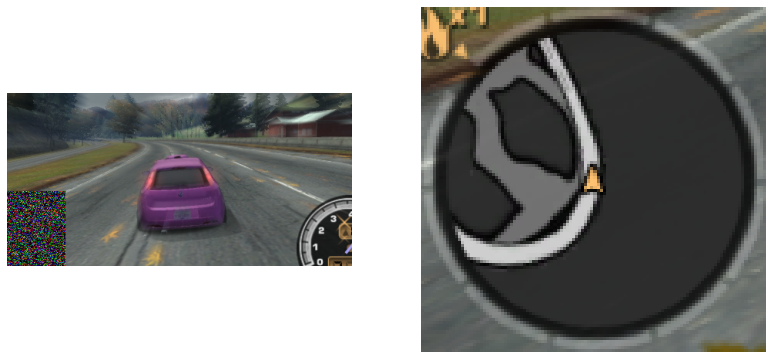

In [5]:
# Look at data

for instance in validation_set.take(1):
    pov = (instance[0][0][0] + 1) / 2 
    nav = (instance[0][1][0] + 1) / 2
    spd = (instance[0][2][0] + 1) * 200
    acc = instance[1][0][0]
    steer = instance[1][0][1]
    
    
    print("index")
    print("speed:", spd.numpy())
    print("Accelerate", acc.numpy() * 100, "%") if acc.numpy() >= 0 else print("Break", abs(acc.numpy() * 100), "%")
    print("Left", steer.numpy() * 100, "%") if steer.numpy() >= 0 else print("Right", abs(steer.numpy() * 100), "%")
    
    plt.figure(figsize=(21, 7))
    
    plt.subplot(131)
    plt.imshow(pov)
    plt.xlabel(f"POV with shape {pov.shape}")
    plt.axis("off")
    plt.subplot(132)
    plt.imshow(nav)
    plt.xlabel(f"MAP with shape {nav.shape}")
    plt.axis("off")
    plt.show()
    


    

### Define Model Architecture
#### Model versions 2.1 to 2.?

In [ ]:
# Define Model Architecture
# Model 2.1 | first try
input_shape = (224, 448, 3)
n_outputs = 5

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False,
                                                  input_tensor=tf.keras.Input(shape=input_shape))
avg_layer = keras.layers.GlobalAveragePooling2D()(base_model.output)
output_layer = keras.layers.Dense(n_outputs, activation="sigmoid")(avg_layer)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
# Define Model Architecture
# Model 2.2 | no global pooling and a more deeper network on the output of the base_model
input_shape = (224, 448, 3)
dense_neurons = 5000
n_outputs = 5

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False,
                                                  input_tensor=tf.keras.Input(shape=input_shape))
conv_layer = keras.layers.Conv2D(filters=500, kernel_size=(1,1), strides=1, padding="same")(base_model.output)
max_pooling1 = keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="same")(conv_layer)
max_pooling2 = keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="same")(max_pooling1)
Flatten_layer = keras.layers.Flatten()(max_pooling2)
dense_layer = keras.layers.Dense(dense_neurons, activation="elu")(Flatten_layer)
norm_layer = keras.layers.BatchNormalization()(dense_layer)
output_layer = keras.layers.Dense(n_outputs, activation="sigmoid")(norm_layer)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
# Define Model Architecture
# Model 2.3 | average pooling and more spatial information
input_shape = (224, 448, 3)
dense_neurons = 2000
# dense_neurons2 = 50
n_outputs = 5

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False,
                                                  input_tensor=tf.keras.Input(shape=input_shape))
conv_layer1 = keras.layers.Conv2D(filters=512, kernel_size=(1,1), strides=1, padding="same")(base_model.output)
norm_layer1 = keras.layers.BatchNormalization()(conv_layer1)
avg_pooling = keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same")(norm_layer1)
conv_layer2 = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=1, padding="same")(avg_pooling)
norm_layer2 = keras.layers.BatchNormalization()(conv_layer2)
flatten_layer = keras.layers.Flatten()(norm_layer2)
dense_layer = keras.layers.Dense(dense_neurons, activation="elu")(flatten_layer)
norm_layer3 = keras.layers.BatchNormalization()(dense_layer)
output_layer = keras.layers.Dense(n_outputs, activation="sigmoid")(norm_layer3)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
# Define Model Architecture
# Model 2.4 | added a dense layer with fewer neurons right before the output
input_shape = (224, 448, 3)
dense_neurons1 = 700
dense_neurons2 = 60
n_outputs = 5

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False,
                                                  input_tensor=tf.keras.Input(shape=input_shape))
conv_layer1 = keras.layers.Conv2D(filters=512, kernel_size=(1,1), strides=1, padding="same")(base_model.output)
norm_layer1 = keras.layers.BatchNormalization()(conv_layer1)
avg_pooling = keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same")(norm_layer1)
conv_layer2 = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=1, padding="same")(avg_pooling)
norm_layer2 = keras.layers.BatchNormalization()(conv_layer2)
flatten_layer = keras.layers.Flatten()(norm_layer2)
dense_layer = keras.layers.Dense(dense_neurons1, activation="elu")(flatten_layer)
norm_layer3 = keras.layers.BatchNormalization()(dense_layer)
dense_layer2 = keras.layers.Dense(dense_neurons2, activation="elu")(norm_layer3)
norm_layer4 = keras.layers.BatchNormalization()(dense_layer2)
output_layer = keras.layers.Dense(n_outputs, activation="sigmoid")(norm_layer4)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
# Define Model Architecture
# Model 2.4b | removed batch normalization before output layer
input_shape = (224, 448, 3)
dense_neurons1 = 700
dense_neurons2 = 60
n_outputs = 5

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False,
                                                  input_tensor=tf.keras.Input(shape=input_shape))
conv_layer1 = keras.layers.Conv2D(filters=512, kernel_size=(1,1), strides=1, padding="same")(base_model.output)
norm_layer1 = keras.layers.BatchNormalization()(conv_layer1)
avg_pooling = keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same")(norm_layer1)
conv_layer2 = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=1, padding="same")(avg_pooling)
norm_layer2 = keras.layers.BatchNormalization()(conv_layer2)
flatten_layer = keras.layers.Flatten()(norm_layer2)
dense_layer = keras.layers.Dense(dense_neurons1, activation="elu")(flatten_layer)
norm_layer3 = keras.layers.BatchNormalization()(dense_layer)
dense_layer2 = keras.layers.Dense(dense_neurons2, activation="elu")(norm_layer3)
# norm_layer4 = keras.layers.BatchNormalization()(dense_layer2)
output_layer = keras.layers.Dense(n_outputs, activation="sigmoid")(dense_layer2)#(norm_layer4)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

# Result: Values don't jump as much anymore

In [4]:
# Define Model Architecture
# Model 2.6 | further reduce depth while "increasing" the width and height
input_shape = (224, 448, 3)
dense_neurons1 = 700
dense_neurons2 = 60
n_outputs = 5

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False,
                                                  input_tensor=tf.keras.Input(shape=input_shape))
conv_layer1 = keras.layers.Conv2D(filters=512, kernel_size=(1,1), strides=1, padding="same")(base_model.output)
norm_layer1 = keras.layers.BatchNormalization()(conv_layer1)
conv_layer2 = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=1, padding="same")(norm_layer1)
norm_layer2 = keras.layers.BatchNormalization()(conv_layer2)
conv_layer3 = keras.layers.Conv2D(filters=64, kernel_size=(1,1), strides=1, padding="same")(norm_layer2)
norm_layer3 = keras.layers.BatchNormalization()(conv_layer3)
flatten_layer = keras.layers.Flatten()(norm_layer3)
dense_layer = keras.layers.Dense(dense_neurons1, activation="elu")(flatten_layer)
norm_layer3 = keras.layers.BatchNormalization()(dense_layer)
dense_layer2 = keras.layers.Dense(dense_neurons2, activation="elu")(norm_layer3)
output_layer = keras.layers.Dense(n_outputs, activation="sigmoid")(dense_layer2)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

# Accuracy has been slightly reduced
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 448, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 223, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 223, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 223, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
# Define Model Architecture
# Model 2.6 | tanh, mse and no nitro key
input_shape = (224, 448, 3)
dense_neurons1 = 700
dense_neurons2 = 60
n_outputs = 2

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False,
                                                  input_tensor=tf.keras.Input(shape=input_shape))
conv_layer1 = keras.layers.Conv2D(filters=512, kernel_size=(1,1), strides=1, padding="same")(base_model.output)
norm_layer1 = keras.layers.BatchNormalization()(conv_layer1)
avg_pooling = keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same")(norm_layer1)
conv_layer2 = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=1, padding="same")(avg_pooling)
norm_layer2 = keras.layers.BatchNormalization()(conv_layer2)
flatten_layer = keras.layers.Flatten()(norm_layer2)
dense_layer = keras.layers.Dense(dense_neurons1, activation="elu")(flatten_layer)
norm_layer3 = keras.layers.BatchNormalization()(dense_layer)
dense_layer2 = keras.layers.Dense(dense_neurons2, activation="elu")(norm_layer3)
output_layer = keras.layers.Dense(n_outputs, activation="tanh")(dense_layer2)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
# Define Model Architecture
# Model 2.7 | linear and mae
input_shape = (224, 448, 3)
dense_neurons1 = 700
dense_neurons2 = 60
n_outputs = 2

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False,
                                                  input_tensor=tf.keras.Input(shape=input_shape))
conv_layer1 = keras.layers.Conv2D(filters=512, kernel_size=(1,1), strides=1, padding="same")(base_model.output)
norm_layer1 = keras.layers.BatchNormalization()(conv_layer1)
avg_pooling = keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same")(norm_layer1)
conv_layer2 = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=1, padding="same")(avg_pooling)
norm_layer2 = keras.layers.BatchNormalization()(conv_layer2)
flatten_layer = keras.layers.Flatten()(norm_layer2)
dense_layer = keras.layers.Dense(dense_neurons1, activation="elu")(flatten_layer)
norm_layer3 = keras.layers.BatchNormalization()(dense_layer)
dense_layer2 = keras.layers.Dense(dense_neurons2, activation="elu")(norm_layer3)
output_layer = keras.layers.Dense(n_outputs, activation="linear")(dense_layer2)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
# Define Model Architecture
# Model 2.8 | resnet50 as base_model
input_shape = (224, 448, 3)
dense_neurons1 = 700
dense_neurons2 = 60
n_outputs = 2

base_model = keras.models.load_model("models 2\\00 base_models\\base_model_resnet50")
conv_layer1 = keras.layers.Conv2D(filters=512, kernel_size=(1,1), strides=1, padding="same")(base_model.output)
norm_layer1 = keras.layers.BatchNormalization()(conv_layer1)
# avg_pooling = keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same")(norm_layer1)
conv_layer2 = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=1, padding="same")(norm_layer1)#(avg_pooling)
norm_layer2 = keras.layers.BatchNormalization()(conv_layer2)
flatten_layer = keras.layers.Flatten()(norm_layer2)
dense_layer1 = keras.layers.Dense(dense_neurons1, activation="relu")(flatten_layer)
norm_layer3 = keras.layers.BatchNormalization()(dense_layer1)
dense_layer2 = keras.layers.Dense(dense_neurons2, activation="relu")(norm_layer3)
output_layer = keras.layers.Dense(n_outputs, activation="tanh")(dense_layer2)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

for layer in base_model.layers:
    layer.trainable = False

model.summary()

In [ ]:
# Define Model Architecture
# Model 2.8 | resnet50 as base_model
input_shape = (224, 448, 3)
dense_neurons1 = 700
dense_neurons2 = 60
output_neurons = 2

base_model = keras.models.load_model("models 2\\00 base_models\\base_model_resnet50")
conv_layer1 = keras.layers.Conv2D(filters=1024, kernel_size=(3,3), strides=1, padding="same")(base_model.output)
norm_layer1 = keras.layers.BatchNormalization()(conv_layer1)
conv_layer2 = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=1, padding="same")(norm_layer1)
norm_layer2 = keras.layers.BatchNormalization()(conv_layer2)
conv_layer3 = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=1, padding="same")(norm_layer2)
norm_layer3 = keras.layers.BatchNormalization()(conv_layer3)
conv_layer4 = keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="same")(norm_layer3)
norm_layer4 = keras.layers.BatchNormalization()(conv_layer4)
conv_layer5 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="same")(norm_layer4)
norm_layer5 = keras.layers.BatchNormalization()(conv_layer5)
flatten_layer = keras.layers.Flatten()(norm_layer5)
dense_layer1 = keras.layers.Dense(dense_neurons1, activation="relu")(flatten_layer)
norm_layer3 = keras.layers.BatchNormalization()(dense_layer1)
dense_layer2 = keras.layers.Dense(dense_neurons2, activation="relu")(norm_layer3)
output_layer = keras.layers.Dense(output_neurons, activation="tanh")(dense_layer2)
model = keras.Model(inputs=base_model.input, outputs=output_layer)

for layer in base_model.layers:
    layer.trainable = False

model.summary()

In [ ]:
# Define Model Architecture
# Model 2.10 | light weight cnn for quicker run time
input_shape = (224, 448, 3)
dense_neurons1 = 1000
dense_neurons2= 50
output_neurons = 2

model = keras.Sequential([
    # Shape = 224x448x3
    keras.layers.Input(shape=input_shape),
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2, padding="same"),
    # Shape = 112x224x64
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same"),
    # Shape = 56x112x64
    keras.layers.Conv2D(filters=32, kernel_size=(1,1), strides=1, padding="same"),
    # Shape = 56x112x32
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2, padding="same"),
    # Shape = 28x56x64
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same"),
    # Shape = 14x28x64
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="same"),
    # Shape = 14x28x128
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(1,1), strides=1, padding="same"),
    # Shape = 14x28x64
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="same"),
    # Shape = 14x28x32
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=16, kernel_size=(1,1), strides=1, padding="same"),
    # Shape = 14x28x16
    keras.layers.Flatten(),
    # Shape = 6272x1
    keras.layers.Dense(dense_neurons1, activation="elu"),
    # Shape = 1000
    keras.layers.BatchNormalization(),
    keras.layers.Dense(dense_neurons2, activation="elu"),
    # Shape = 50x1
    keras.layers.Dropout(0.3),
    keras.layers.Dense(output_neurons, activation="tanh"),
    # Shape = 2x1
])

model.summary()

In [ ]:
# Define Model Architecture
# Model 2.11 | separable convolution
input_shape = (224, 448, 3)
dense_neurons1 = 200
dense_neurons2= 50
output_neurons = 2

model = keras.Sequential([
    # Shape = 224x448x3
    keras.layers.Input(shape=input_shape),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=2, padding="same"),
    # Shape = 112x224x64
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same"),
    # Shape = 56x112x64
    keras.layers.SeparableConv2D(filters=128, kernel_size=(3,3), strides=1, padding="same", depth_multiplier=1),
    # Shape = 56x112x128
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same"),
    # Shape = 28x56x128
    keras.layers.SeparableConv2D(filters=128, kernel_size=(3,3), strides=2, padding="same", depth_multiplier=1),
    # Shape = 14x28x128
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=128, kernel_size=(3,3), strides=2, padding="same", depth_multiplier=1),
    # Shape = 7x14x128
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(1,1), strides=1, padding="same"),
    # Shape = 7x14x32
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=8, kernel_size=(1,1), strides=1, padding="same"),
    # Shape = 7x14x8
    keras.layers.Flatten(),
    # Shape = 6272x1
    keras.layers.BatchNormalization(),
    keras.layers.Dense(dense_neurons1, activation="elu"),
    # Shape = 1000x1
    keras.layers.BatchNormalization(),
    keras.layers.Dense(dense_neurons2, activation="elu"),
    # Shape = 50x1
    keras.layers.Dropout(0.3),
    keras.layers.Dense(output_neurons, activation="tanh"),
    # Shape = 2x1
])

model.summary()

In [6]:
# Define Model Architecture
# Model 2.12 | with pov, map and speed
pov_input_shape = (224, 448, 3)
map_input_shape = (112, 112, 3)
spd_input_shape = (1,)
dense_neurons1 = 1000
dense_neurons2 = 100
dense_neurons3 = 10
output_neurons = 2

# POV
pov_input = keras.layers.Input(shape=pov_input_shape)
pov_base_model = keras.applications.xception.Xception(weights="imagenet",
                                                      include_top=False,
                                                      input_tensor=pov_input)
pov_conv_layer1 = keras.layers.Conv2D(filters=1024, kernel_size=(3,3), strides=1, padding="same")(pov_base_model.output)
pov_norm_layer1 = keras.layers.BatchNormalization()(pov_conv_layer1)
pov_conv_layer2 = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=1, padding="same")(pov_norm_layer1)
pov_norm_layer2 = keras.layers.BatchNormalization()(pov_conv_layer2)
pov_conv_layer3 = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=1, padding="same")(pov_norm_layer2)
pov_norm_layer3 = keras.layers.BatchNormalization()(pov_conv_layer3)
pov_conv_layer4 = keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding="same")(pov_norm_layer3)
pov_norm_layer4 = keras.layers.BatchNormalization()(pov_conv_layer4)
pov_conv_layer5 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="same")(pov_norm_layer4)
pov_norm_layer5 = keras.layers.BatchNormalization()(pov_conv_layer5)
pov_flatten_layer = keras.layers.Flatten()(pov_norm_layer5)

# MAP
map_input = keras.layers.Input(shape=map_input_shape)
map_conv_layer1 = keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=2, padding="same")(map_input)
# Shape = 56x112x64
map_norm_layer1 = keras.layers.BatchNormalization()(map_conv_layer1)
map_avg_layer1 = keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same")(map_norm_layer1)
# Shape = 28x56x64
map_sep_conv_layer1 = keras.layers.SeparableConv2D(filters=128, kernel_size=(3,3), strides=1, padding="same", depth_multiplier=1)(map_avg_layer1)
# Shape = 28x56x128
map_norm_layer2 = keras.layers.BatchNormalization()(map_sep_conv_layer1)
map_avg_layer2 = keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="same")(map_norm_layer2)
# Shape = 14x28x128
map_sep_conv_layer2 = keras.layers.SeparableConv2D(filters=128, kernel_size=(3,3), strides=2, padding="same", depth_multiplier=1)(map_avg_layer2)
# Shape = 7x14x128
map_norm_layer3 = keras.layers.BatchNormalization()(map_sep_conv_layer2)
map_sep_conv_layer3 = keras.layers.SeparableConv2D(filters=64, kernel_size=(3,3), strides=1, padding="same", depth_multiplier=1)(map_norm_layer3)
# Shape = 7x14x64
map_norm_layer4 = keras.layers.BatchNormalization()(map_sep_conv_layer3)
map_conv_layer2 = keras.layers.Conv2D(filters=32, kernel_size=(1,1), strides=1, padding="same")(map_norm_layer4)
# Shape = 7x14x32
map_norm_layer5 = keras.layers.BatchNormalization()(map_conv_layer2)
map_conv_layer3 = keras.layers.Conv2D(filters=8, kernel_size=(1,1), strides=1, padding="same")(map_norm_layer5)
# Shape = 7x14x8
map_flatten_layer = keras.layers.Flatten()(map_conv_layer3)

# SPEED
spd_input = keras.layers.Input(shape=spd_input_shape)
# spd_input = tf.expand_dims(spd_input, axis=1)

# After Concatenation
concat_layer1 = keras.layers.concatenate([pov_flatten_layer, map_flatten_layer])
dense_layer1 = keras.layers.Dense(dense_neurons1, activation="elu")(concat_layer1)
norm_layer3 = keras.layers.BatchNormalization()(dense_layer1)
dense_layer2 = keras.layers.Dense(dense_neurons2, activation="elu")(norm_layer3)
concat_layer2 = keras.layers.concatenate([dense_layer2, spd_input])
dense_layer3 = keras.layers.Dense(dense_neurons1, activation="elu")(concat_layer2)
output_layer = keras.layers.Dense(output_neurons, activation="tanh")(dense_layer3)

model = keras.Model(inputs=[pov_base_model.input, map_input, spd_input], outputs=output_layer)

model.summary()

# keras.utils.plot_model(model, to_file="model.png")


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 448, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 223, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 223, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 223, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [ ]:
import pydotplus
import pydot
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot
keras.utils.pydot = pydot
plot_model(model, to_file="model.png")

In [ ]:
import pydot as pyd
from IPython .display import SVG
from tensorflow.keras.utils import model_to_dot

print(pyd.__version__)

tf.keras.utils.pydot = pyd
keras.utils.pydot = pyd

def visualize_model(model1):
    return SVG(model_to_dot(model1).create(prog="dot.exe", format="svg"))

visualize_model(model)
tf.keras.utils.plot_model(model, to_file="model.png")

### Training freezed model

In [7]:
# Freeze layers
for layer in pov_base_model.layers:
    layer.trainable = False

In [8]:
# training dense layer(s)
# optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
opt = keras.optimizers.Adam(learning_rate=0.003)
patience = 1
max_epochs = 3
model_save_path = f"models 2/12th-model4__freezed_keyboard_povMapSpd_{time.strftime('%Y_%m_%d-%H_%M_%S')}"
run_logdir = time.strftime("logs/freezed_run_%Y_%m_%d-%H_%M_%S")
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath="model 2/checkpoints/model12_freezed.h5", save_best_only=True),
    tf.keras.callbacks.TensorBoard(run_logdir),
]

model.compile(loss='mse', optimizer=opt, metrics=['mae', 'mse', 'accuracy'])
history = model.fit(train_set,
                    epochs=max_epochs,
                    callbacks=my_callbacks,
                    validation_data=validation_set,
                   )

model.save(model_save_path)

Epoch 1/3
      1/Unknown - 0s 0s/step - loss: 0.6542 - mae: 0.6689 - mse: 0.6542 - accuracy: 0.5625WARNING:tensorflow:From d:\anaconda\envs\env37\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
      2/Unknown - 0s 151ms/step - loss: 0.7413 - mae: 0.6686 - mse: 0.7413 - accuracy: 0.6562WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0189s vs `on_train_batch_end` time: 0.2743s). Check your callbacks.
  19687/Unknown - 3570s 181ms/step - loss: nan - mae: nan - mse: nan - accuracy: 0.9825WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0130s vs `on_test_batch_end` time: 0.1267s). Check your callbacks.


d:\anaconda\envs\env37\lib\site-packages\tensorflow\python\keras\callbacks.py:1664: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


TypeError: object of type 'NoneType' has no len()

In [9]:
# Save Model
model.save(model_save_path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models 2/12th-model4__freezed_keyboard_povMapSpd_2021_01_31-23_17_40\assets


### Train whole Model

In [ ]:
# Load existing model
model_load_path = f"models 2\\12thModel2_unfreezed_censoredMap_povMapSpd__2021_01_24-18_22_38"
# model_load_path = model_save_path
model = keras.models.load_model(model_load_path)

In [ ]:
for layer in model.layers:
    layer.trainable = True

In [ ]:
max_epochs = 5
patience = 1
# optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.09, decay=0.001)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_save_path = f"models 2/12thModel3_unfreezed_freezed_UNcensoredMap_povMapSpd__{time.strftime('%Y_%m_%d-%H_%M_%S')}"
run_logdir = time.strftime("logs/unfreezed_run_%Y_%m_%d-%H_%M_%S")
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath="model 2/checkpoints/model12_unfreezed2.h5", save_best_only=True),
    tf.keras.callbacks.TensorBoard(run_logdir),
]
model.compile(loss='mae',
              optimizer=opt,
              metrics=['mae', 'mse', 'accuracy'],
             )

history = model.fit(train_set, 
                    epochs=max_epochs,
                    callbacks=my_callbacks,
                    validation_data=validation_set,
                   )

model.save(model_save_path)


In [ ]:
model.save(model_save_path)

### Custom Test function

In [ ]:
# Load existing model
model_load_path = f"models 2\\12thModel3_unfreezed_UNcensoredMap_povMapSpd__2021_01_24-21_04_11"
# model_load_path = model_save_path
model = keras.models.load_model(model_load_path)

In [ ]:
for batch in train_set.take(1):
    X = batch[0]
    y_true = batch[1].numpy()
    y_pred = model.predict(batch)
    differences = tf.math.abs(y_true - y_pred)
    own_mae = tf.reduce_mean(differences)
    tf_mae = tf.reduce_mean(keras.losses.MAE(y_true, y_pred))
    own_mse = tf.reduce_mean(differences **2)
    tf_mse = tf.reduce_mean(keras.losses.MSE(y_true, y_pred))
    differences_list = differences.numpy()
    differences_list = [[round(float(item), 3) for item in l] for l in differences_list]
    
#     plt.imshow((X+1)/2)
#     plt.axis("off")
#     plt.show()

#     print("\nPrediction:")
#     print(y_pred)
#     print("\nTarget:")
#     print(true_list)
#     print("\nDeltas:")
#     print(np.array(differences_list))
    print("\nOwn Mean Absolute Error:")
    print(own_mae)
    print("\nTensorflow Mean Absolute Error:")
    print(tf_mae)
    print("\nOwn Squared Error:")
    print(own_mse)
    print("\nTensorflow Mean Squared Error:")
    print(tf_mse)
    print()

    df1 = pd.DataFrame(y_pred)
    df2 = pd.DataFrame(y_true)
    df3 = pd.DataFrame(differences.numpy())
    df_concat = pd.concat([df1, df2, df3], axis=1)
    df_concat.columns = ["pred_acc", "pred_steer", "target_acc", "target_steer", "delta_acc", "delta_steer"]
    print(df_concat)

In [ ]:
df1 = pd.DataFrame(y_pred)
df2 = pd.DataFrame(y_true)
df3 = pd.DataFrame(differences.numpy())
df_concat = pd.concat([df1, df2, df3], axis=1)
df_concat.columns = ["pred_acc", "pred_steer", "target_acc", "target_steer", "delta_acc", "delta_steer"]
print(df_concat)

### Experimenting with models and data

In [ ]:
files_pattern = "training_data\\processed_data\\big_records_preprocessed\\experiment*.tfrecord"
file_paths = tf.data.Dataset.list_files(files_pattern)

dataset = data_input_pipeline(file_paths, 32)

In [ ]:
index = random.randrange(5)
# index = 10

for instance in train_set.skip(index).take(1):
    print(f"batch shape: {instance[0].shape}")
    print(f"Index: {index}")
    plt.imshow((instance[0]+1)/2)
    plt.axis("off")
    plt.show()
    
    print(f"Keys_24: {instance[1][0]}")

In [ ]:
# Experiment 1
random_0to1 = tf.random.uniform((1,))
print(random_0to1)
probability = 0.6


if random_0to1 < probability:
    print("Yup")
else:
    print("Nope")

In [ ]:
# Experiment 2

some_const = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8]])
# some_tensor = tf.Tensor([[3, 1, 4, 1], [5, 9, 2, 6]], shape=(2, 4), dtype=tf.int32)
some_const1 = tf.constant([some_const[1], some_const[0]])

print(some_const1)

In [ ]:
some_random_tensor = random_brightness(tf.constant([[[0., 1., 2., 3., 4., 100]]], dtype=tf.float32), 0.1)
print(some_random_tensor.numpy())

In [ ]:
# tensorboard

# %load_ext tensorboard
%tensorboard --logdir=./logs --port=6006

In [ ]:
print(list(range(20))[::5])

## Look at instances

In [ ]:
# Read from .tfrecord file
record_path1 = "training_data\\SteeringWheel_TEST_2021_01_19-18_02_26.tfrecord"
record_path2 = "training_data\\SteeringWheel_TEST_2021_01_19-18_05_04.tfrecord"
record_path3 = "training_data\\SteeringWheel_bigWindow_TEST1_2021_01_19-19_29_17.tfrecord"
record_path4 = "training_data\\SteeringWheel_bigWindow_TEST1_2021_01_19-19_31_41.tfrecord"
record_path5 = "training_data\\train_3thP_High99_chaseH5_fastBMW_SteeringWheel_2021_01_20-17_23_18.tfrecord"

parsing_features = {
          "image_raw": FixedLenFeature([], tf.string),
          "label" : FixedLenFeature([], tf.string),
        }

In [ ]:
def _parse_function(example_proto):
    feature_description = {
        "image_raw": FixedLenFeature([], tf.string),
        "label" : FixedLenFeature([], tf.string),
    }
    # Parse the input `tf.train.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)


def decode_tfrecord(inst):
    inst["image_raw"] = tf.io.parse_tensor(inst["image_raw"], out_type=tf.uint8)
    inst["label"] = tf.io.parse_tensor(inst["label"], out_type=tf.float32)
    return inst

In [ ]:
dataset = tf.data.TFRecordDataset([record_path5])
dataset = dataset.map(_parse_function, num_parallel_calls=-1)
dataset = dataset.map(decode_tfrecord, num_parallel_calls=-1)

In [ ]:
n_skips = random.randrange(3000)

for inst in dataset.skip(n_skips).take(1):
    img = inst["image_raw"]
    keys = inst["label"]
    keys = tf.math.round(1000 * keys) / 1000
    
    print("index:", n_skips)
    plt.figure(figsize=(15, 10))
    plt.imshow(img.numpy())
    plt.axis("off")
    plt.show()
    
    print(keys.numpy())
    print("img shape:", img.shape)

In [ ]:
# base paths
hdd_base_path = "H:\\Programming\\My Projects\\NFSMW-AI"
ssd_base_path = "F:\\1 Desktopfiles\\01 Programming\\05 My Projects\\nfsmw-ai"
# Files get saved to this folder
processed_files_dir = "training_data\\processed_data\\big_steering_wheel_records_preprocessed"
# pattern of raw files
raw_files_pattern = "raw_training_data\\*steeringWheel*\\train*.tfrecord"
# change current directory to hdd
os.chdir(hdd_base_path)
# collect file names that match the pattern
raw_file_paths = tf.data.Dataset.list_files(raw_files_pattern)

total_raw_files = raw_file_paths.cardinality().numpy()
raw_file_count = 0
for path in raw_file_paths.take(5):
    raw_file_count += 1
    print(time.strftime("[%H:%M:%S]"), f"[raw file {raw_file_count}/{total_raw_files}]", "\n", str(path.numpy(), "utf-8"), "\n")